# Master Thesis

# Evaluating the robustness of Machine Learning Model 

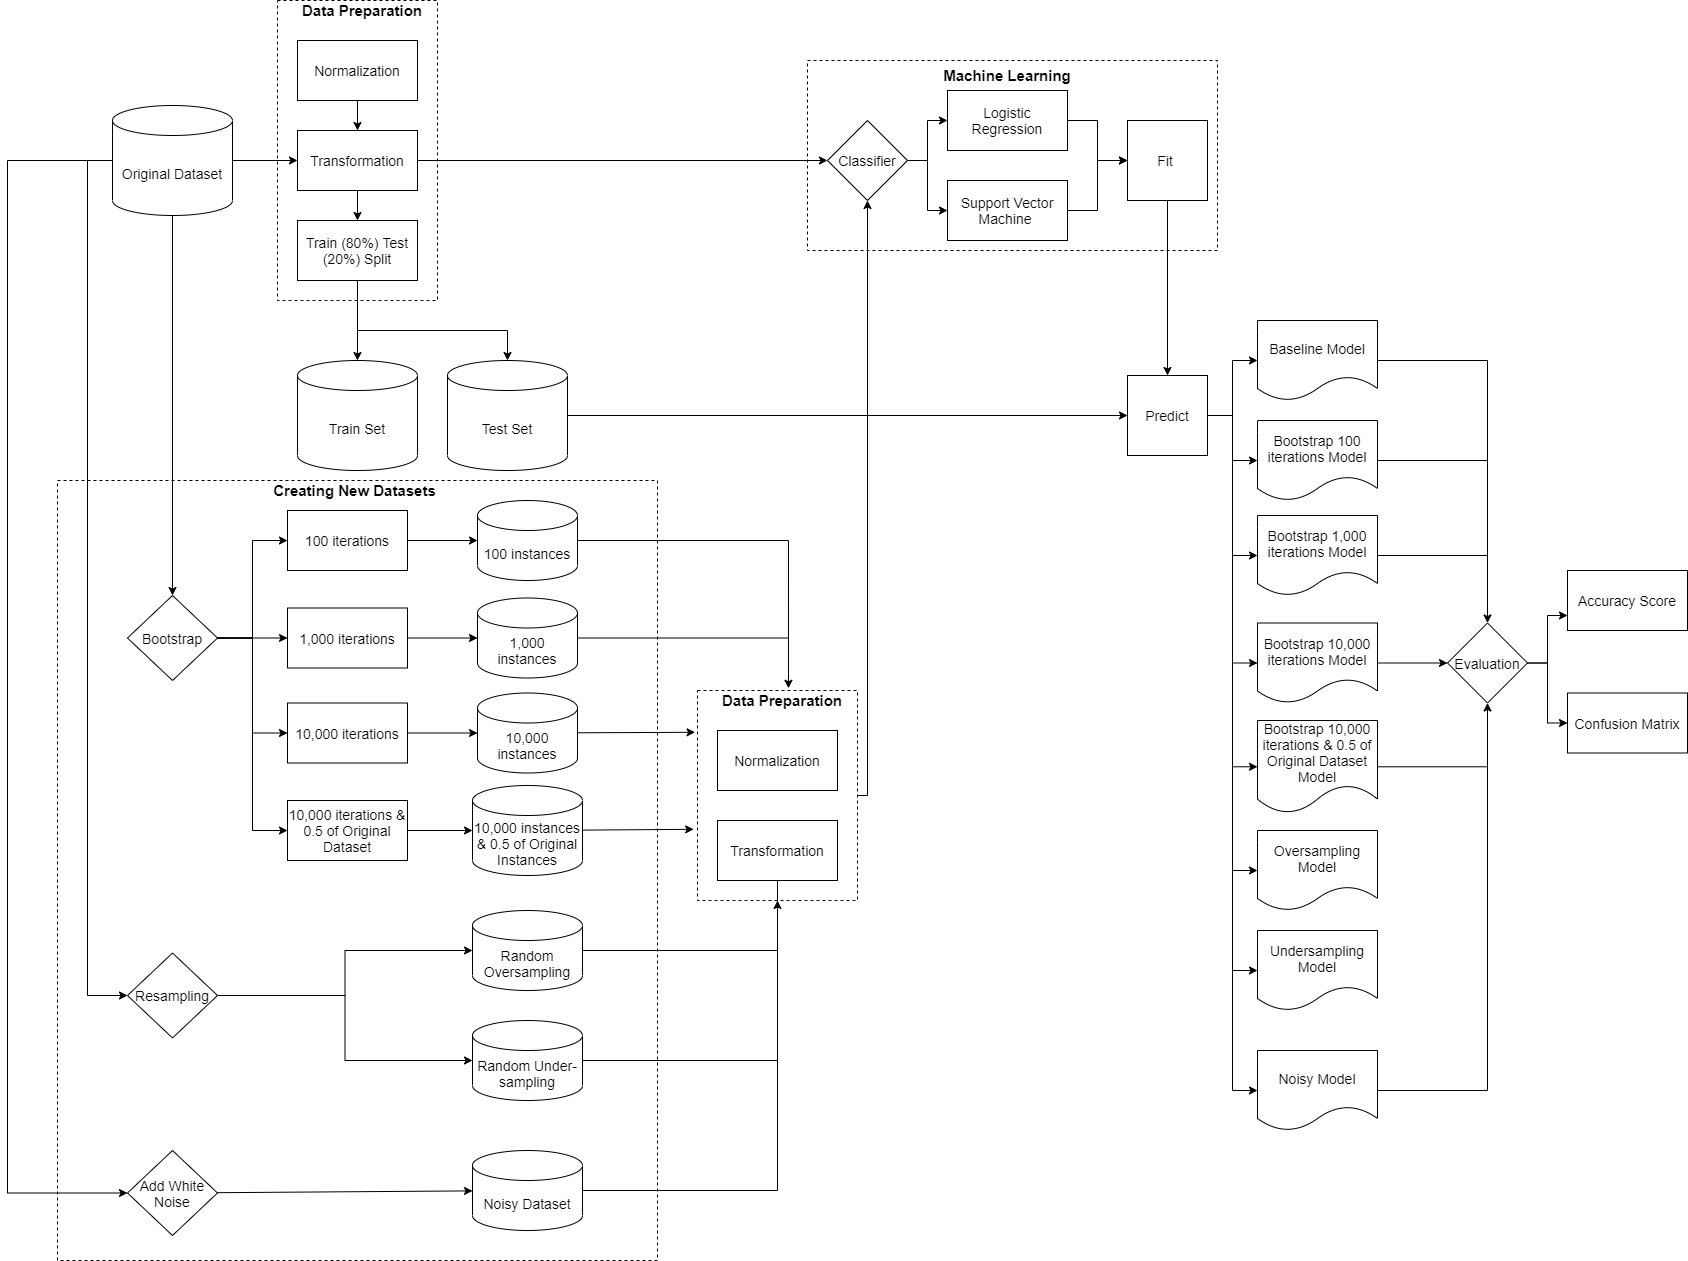

# Import all the relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.svm import SVC
from sklearn.utils import resample
from pandas.plotting import table 

# Import German Credit Dataset

In [2]:
file = "C:/Users/Drago/iCloudDrive/Documents/Documents - Mike’s MacBook Pro/Master/Thesis/Datasets/GC/german.data"

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount',
         'savings', 'pre_employmentsince', 'installmentrate', 'status_sex', 'otherdebtors',
         'pre_residencesince', 'property', 'age', 'otherinstallmentplans', 'housing',
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

# Data Exploration

## Glimpse on dataset

In [3]:
germany = pd.read_csv(file,names = names, delimiter=' ')
print(germany.shape)
print (germany.columns)
germany.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'pre_employmentsince', 'installmentrate',
       'status_sex', 'otherdebtors', 'pre_residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,pre_employmentsince,installmentrate,status_sex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [4]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   pre_employmentsince    1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   status_sex             1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  pre_residencesince     1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

- Observations: 1000 rows and 15 features, object (string) and integer, no null values


In [5]:
germany.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Modify classification column into the binary: 2 -> 1= bad , 1 -> 0 = good

In [6]:
germany.classification.replace([1,2], [0,1], inplace=True)

In [7]:
germany.head(3)

,existingchecking,duration,credithistory,purpose,creditamount,savings,pre_employmentsince,installmentrate,status_sex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0


## Print if it is replaced correctly and count number of good (700) & bad (300) credit

In [8]:
germany.classification.value_counts()

0    700
1    300
Name: classification, dtype: int64

Text(0, 0.5, 'Frequency')

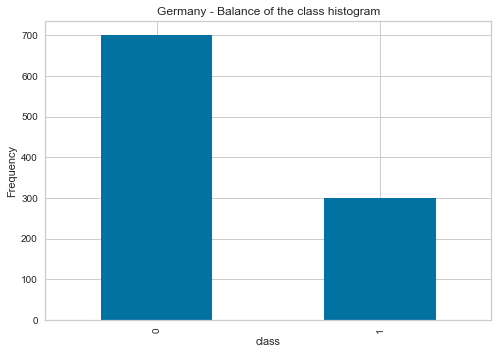

In [9]:
pd.value_counts(germany['classification']).plot.bar()
plt.title('Germany - Balance of the class histogram')
plt.xlabel('class')
plt.ylabel('Frequency')

- Good credit has 700 instances and Bad credit has 300 instances
- This dataset is imbalanced - quite mild

# Exploratory Data Analysis

## Distribution of numerical variables - Histogram

## Duration

Text(0, 0.5, 'Frequency')

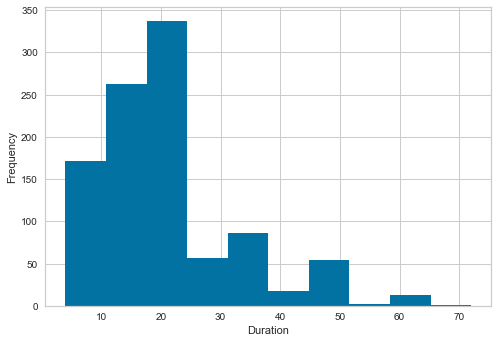

In [10]:
duration_column = germany['duration']
plt.hist(duration_column)
plt.xlabel('Duration')
plt.ylabel('Frequency')

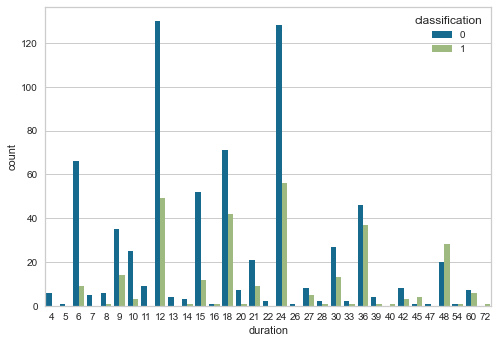

In [11]:
sns.countplot(x='duration', data=germany,hue='classification')

## Creditamount

Text(0, 0.5, 'Frequency')

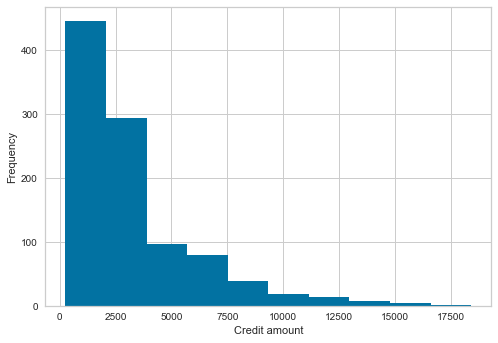

In [12]:
creditamount_column = germany['creditamount']
plt.hist(creditamount_column)
plt.xlabel('Credit amount')
plt.ylabel('Frequency')

## Installmentrate

Text(0, 0.5, 'Frequency')

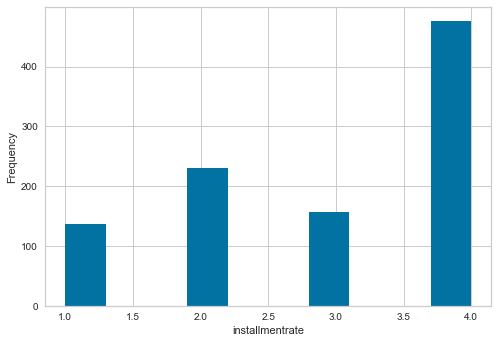

In [13]:
installmentrate_column = germany['installmentrate']
plt.hist(installmentrate_column)
plt.xlabel('installmentrate')
plt.ylabel('Frequency')

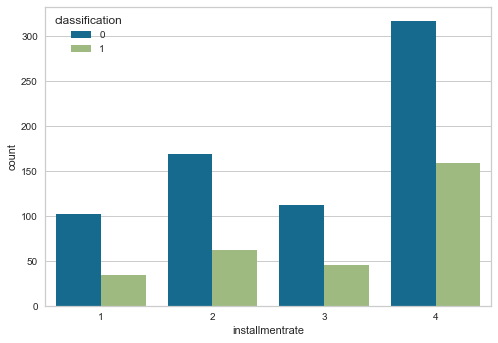

In [14]:
sns.countplot(x='installmentrate', data=germany, hue='classification')

## Pre Residencesince

Text(0, 0.5, 'Frequency')

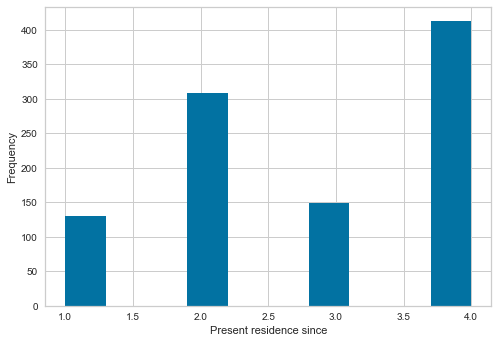

In [15]:
pre_residencesince_column = germany['pre_residencesince']
plt.hist(pre_residencesince_column)
plt.xlabel('Present residence since')
plt.ylabel('Frequency')

## Age

Text(0, 0.5, 'Frequency')

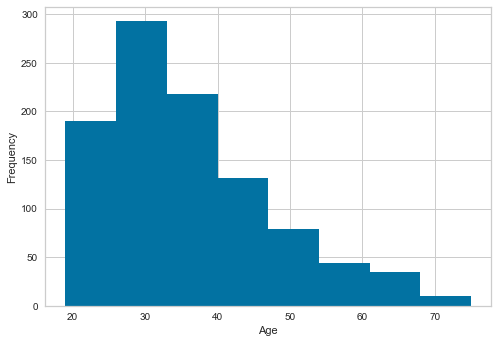

In [16]:
age_column = germany['age']
plt.hist(age_column, bins=8)
plt.xlabel('Age')
plt.ylabel('Frequency')

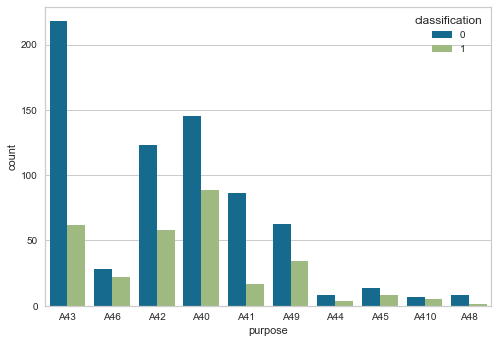

In [17]:
sns.countplot(x='purpose', data=germany, hue='classification')

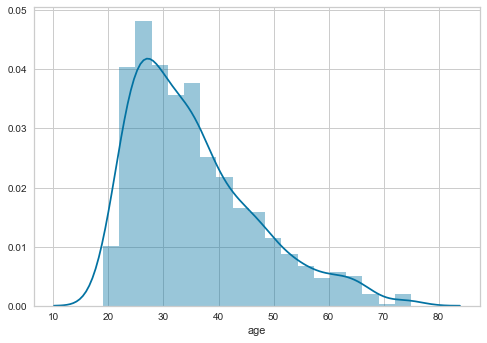

In [18]:
sns.distplot(germany['age'])
plt.show()

## Existingcredits

Text(0, 0.5, 'Frequency')

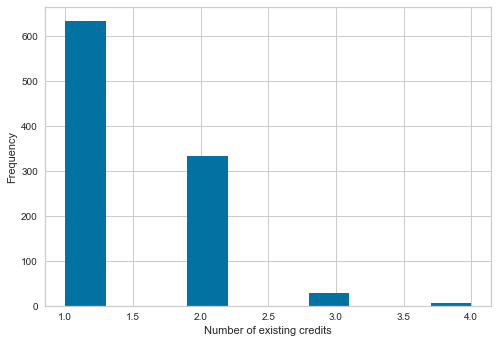

In [19]:
existingcredits_column = germany['existingcredits']
plt.hist(existingcredits_column)
plt.xlabel('Number of existing credits')
plt.ylabel('Frequency')

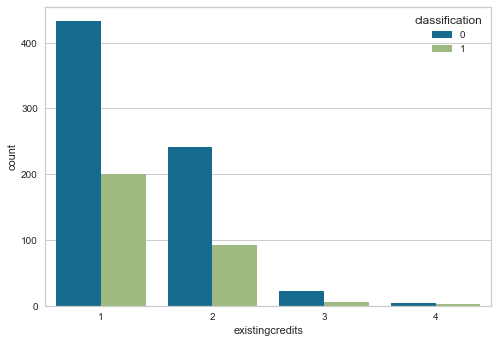

In [20]:
sns.countplot(x='existingcredits', data=germany,hue='classification')

## Peopleliable

Text(0, 0.5, 'Frequency')

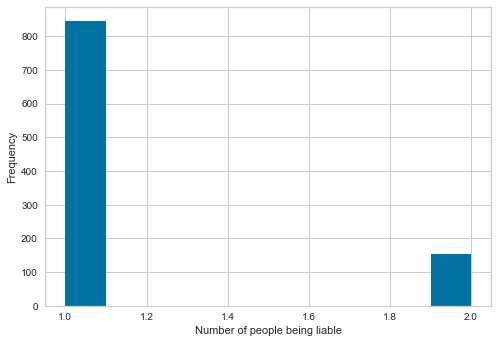

In [21]:
peopleliable_column = germany['peopleliable']
plt.hist(peopleliable_column)
plt.xlabel('Number of people being liable')
plt.ylabel('Frequency')

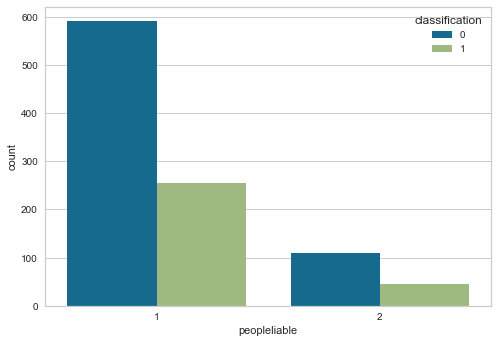

In [22]:
sns.countplot(x='peopleliable', data=germany,hue='classification')

## Box Plot

## Duration

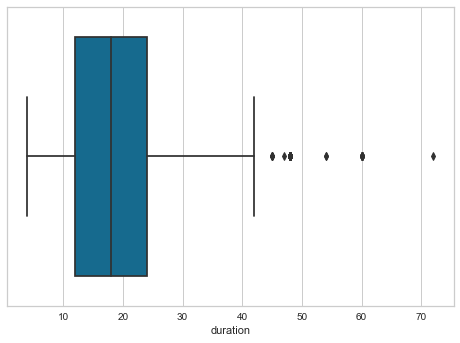

In [23]:
sns.boxplot(x=germany['duration'])

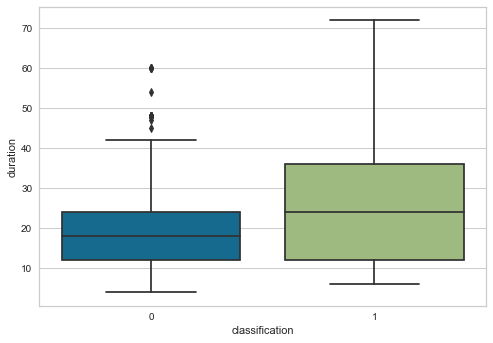

In [24]:
sns.boxplot(x='classification', y='duration', data=germany)

## Creditamount

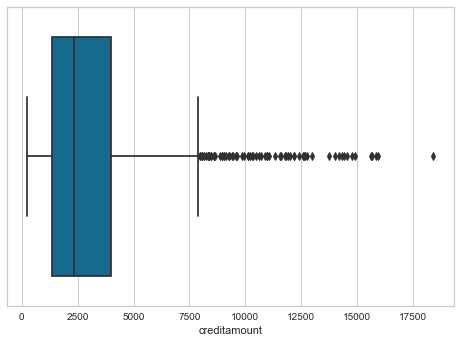

In [25]:
sns.boxplot(x=germany['creditamount'])

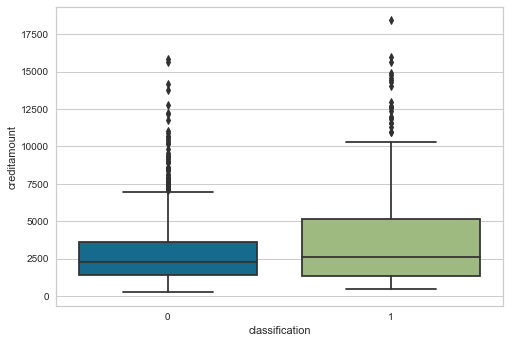

In [26]:
sns.boxplot(x='classification', y='creditamount', data=germany)

## Installmentrate

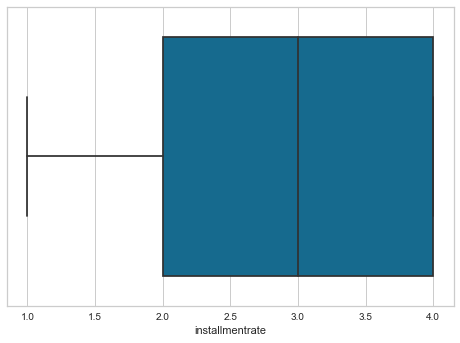

In [27]:
sns.boxplot(x=germany['installmentrate'])

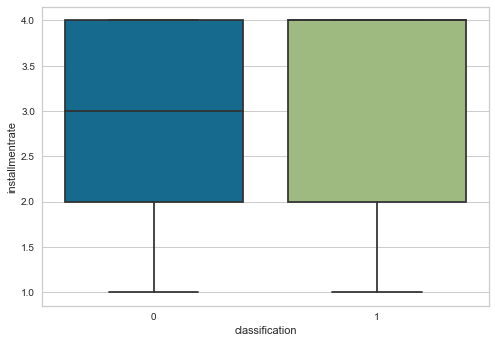

In [28]:
sns.boxplot(x='classification', y='installmentrate', data=germany)

## Pre_residencesince

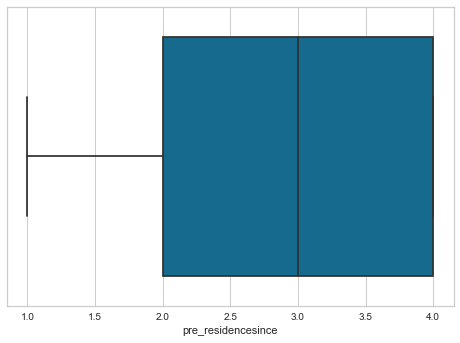

In [29]:
sns.boxplot(x=germany['pre_residencesince'])

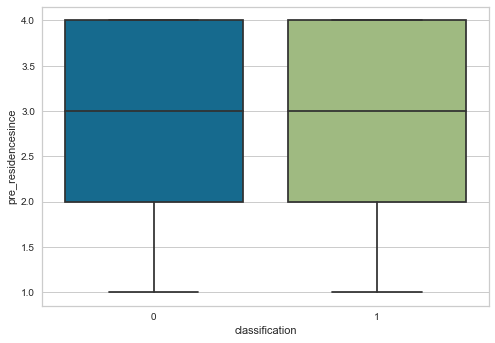

In [30]:
sns.boxplot(x='classification', y='pre_residencesince', data=germany)

## Age

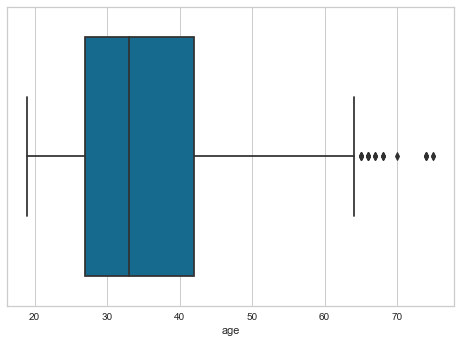

In [31]:
sns.boxplot(x=germany['age'])

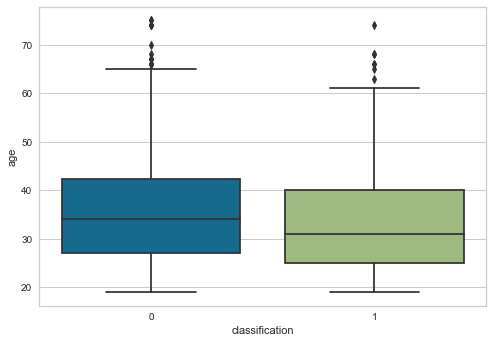

In [32]:
sns.boxplot(x='classification', y='age', data=germany)

## Existingcredits

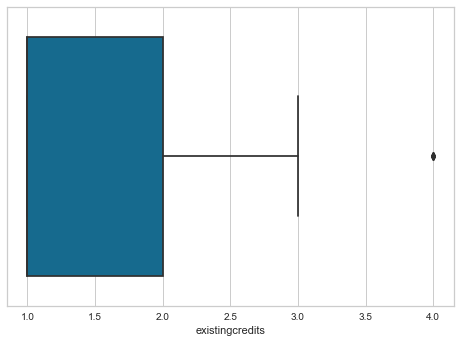

In [33]:
sns.boxplot(x=germany['existingcredits'])

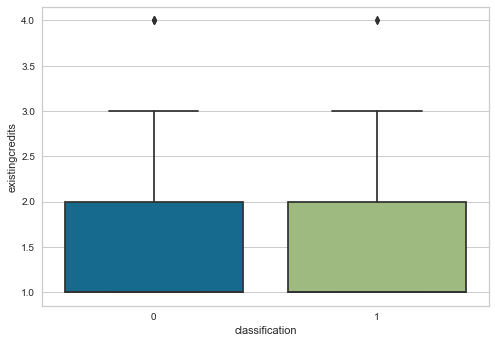

In [34]:
sns.boxplot(x='classification', y='existingcredits', data=germany)

# Data Transformation

## One Hot Encoding - Categorical Features

In [35]:
categorical_variables = names = ['existingchecking', 'credithistory', 'purpose',
         'savings','pre_employmentsince', 'status_sex', 'otherdebtors',
         'property', 'otherinstallmentplans', 'housing',
         'job', 'telephone', 'foreignworker']

In [36]:
d = defaultdict(LabelEncoder)

In [37]:
labelencode = germany[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))

for x in range(len(categorical_variables)):
    print(categorical_variables[x], ": ", germany[categorical_variables[x]].unique())
    print(categorical_variables[x], ": ", labelencode[categorical_variables[x]].unique())

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
pre_employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
pre_employmentsince :  [4 2 3 0 1]
status_sex :  ['A93' 'A92' 'A91' 'A94']
status_sex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


## Create dummy for all the cateogircal variables 

In [38]:
dummycatevar = pd.get_dummies(germany[categorical_variables])

## Concatenate the transformed dataset

In [39]:
numerical_variables = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [40]:
transform_data_clean = pd.concat([germany[numerical_variables], dummycatevar], axis = 1)
print(transform_data_clean.shape)

(1000, 62)


In [41]:
transform_data_clean.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0


In [42]:
transform_data_clean.to_csv('original_wn.csv', index = True, header=True)

## Heatmap

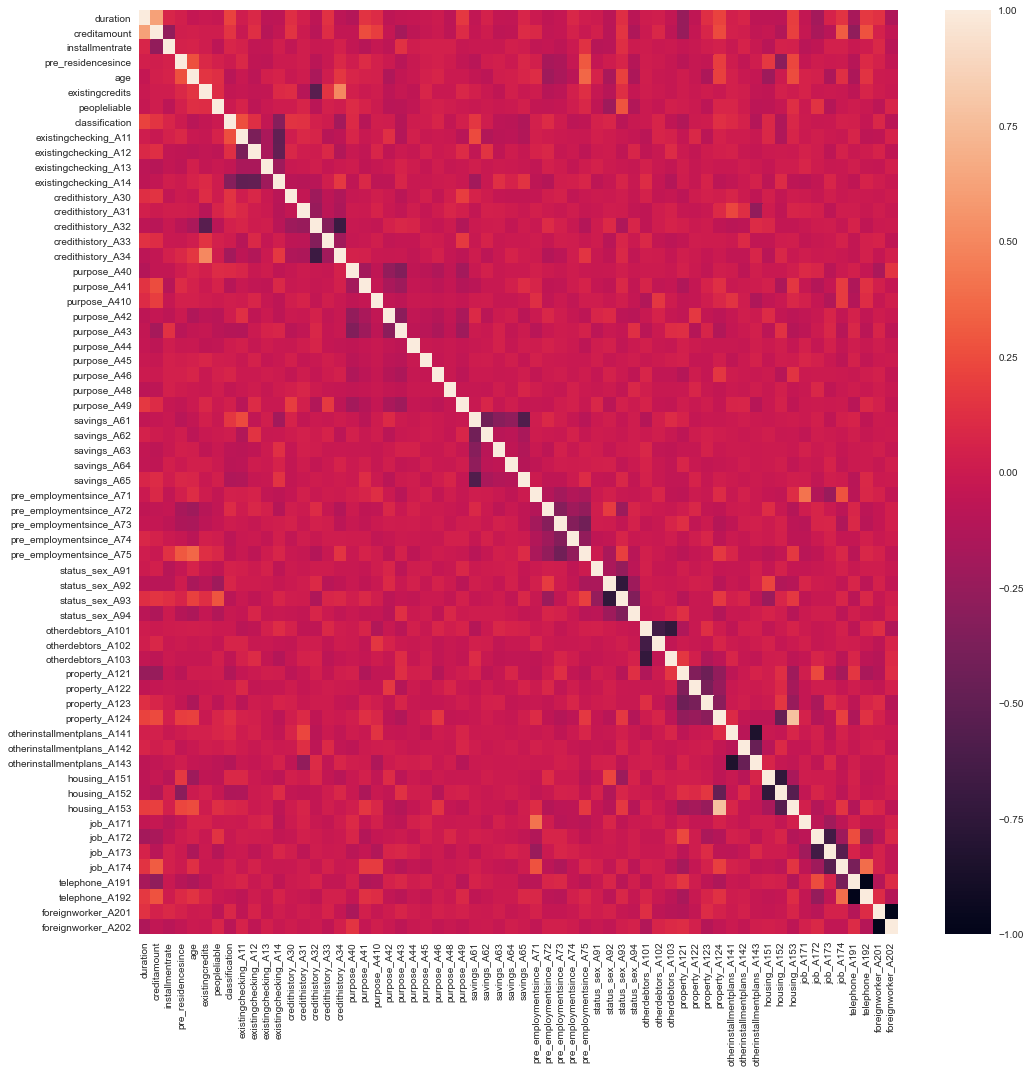

<Figure size 576x396 with 0 Axes>

In [43]:
fig, ax = plt.subplots(figsize=(17,17))   
corrMatrix = transform_data_clean.corr()
sns.heatmap(corrMatrix)
plt.show()
plt.savefig('heatmap.png')

<ipython-input-44-a9906d5d319e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  transform_data_clean.hist(ax = ax)


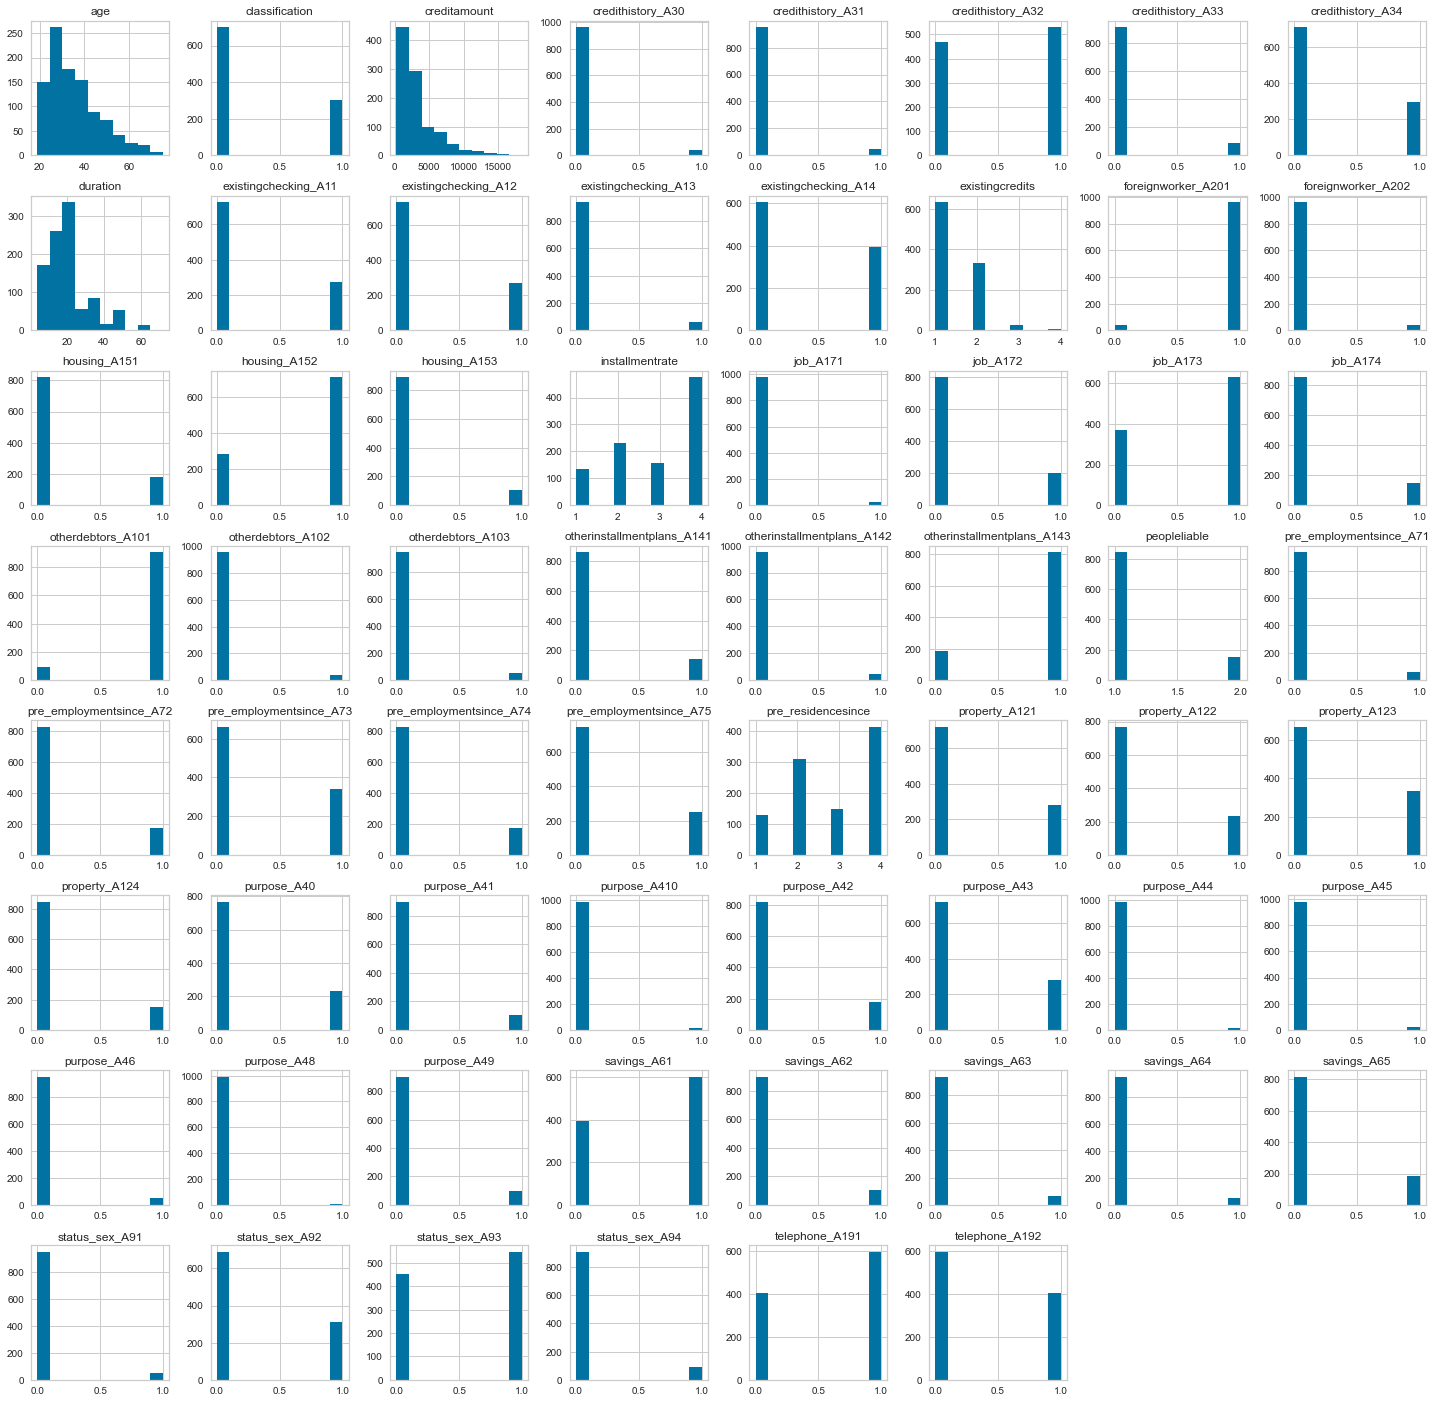

In [44]:
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
transform_data_clean.hist(ax = ax)
plt.savefig('fig.png')

## Using MinMax Scaler for Normalization

In [45]:
min_max_scaler = MinMaxScaler()

germany_mm = pd.DataFrame(min_max_scaler.fit_transform(transform_data_clean[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))

In [46]:
germany_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

transform_data_clean_m = pd.concat([germany_mm,dummycatevar], axis = 1 )

In [47]:
transform_data_clean_m.to_csv('original_n.csv', index = True, header=True)

In [48]:
transform_data_clean_m.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.248574,0.166241,0.657667,0.615000,0.295464,0.135667,0.155000,0.300000,0.274000,0.269000,...,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,0.177336,0.155317,0.372905,0.367906,0.203133,0.192551,0.362086,0.458487,0.446232,0.443662,...,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.061379,0.333333,0.333333,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.205882,0.113871,0.666667,0.666667,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.294118,0.204812,1.000000,1.000000,0.410714,0.333333,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
pd.set_option('max_columns', None)
transform_data_clean_m.describe().to_excel('org_s.xlsx',index=True, header=True)

## Split training and test data - Train_Test_Split Approach

In [50]:
X_classification = transform_data_clean_m.drop('classification', axis = 1)
y_classification = transform_data_clean_m['classification']

X_train, X_test, y_train, y_test = train_test_split(X_classification,y_classification,test_size =0.2, random_state=10)

In [51]:
transform_data_clean_m.classification.value_counts()

0.0    700
1.0    300
Name: classification, dtype: int64

# Classification - Machine Learning Algorithm

## Logistic Regression (LR)

In [52]:
lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

## Confusion Matrix

In [53]:
cfm = confusion_matrix(y_test, y_pred)
print (cfm)

[[120  18]
 [ 30  32]]


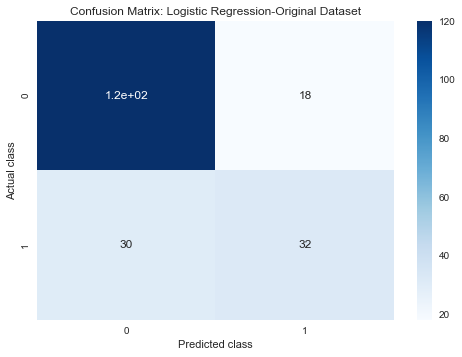

In [54]:
sns.heatmap(cfm, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Original Dataset')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_or.png')

- Positive Class (Bad=1), Negative Class (Good=0)
- True Positive: 32, False negative (Type II): 30, False positive (Type I): 18, True Negative: 120

## LR prediction probability

In [55]:
accu1 = accuracy_score(y_test,y_pred)
print("accuracy_score : ",accu1)

accuracy_score :  0.76


## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


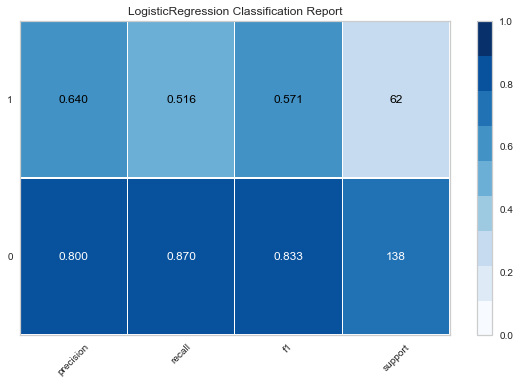

In [56]:
classes = [0,1]
visualizer1 = ClassificationReport(lr, classes=classes, support=True,cmap='Blues')
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

## SVM (linear kernel function)

In [57]:
svm_clf = SVC(kernel='linear', probability=True)

In [58]:
svm_clf.fit(X_train,y_train)
y_pred_2 = svm_clf.predict(X_test)

## Confusion Matrix

In [59]:
cfm_2 = confusion_matrix(y_test, y_pred_2)
print (cfm_2)

[[121  17]
 [ 30  32]]


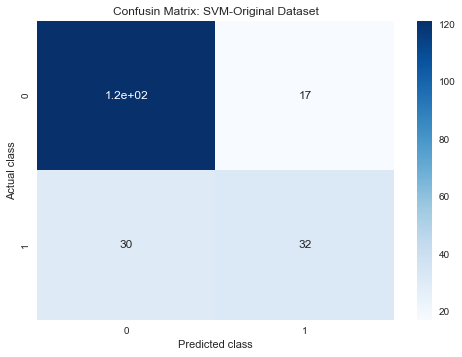

In [60]:
sns.heatmap(cfm_2, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Original Dataset')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_or.png')

## SVM prediction probability

In [61]:
accu2 = accuracy_score(y_test,y_pred_2)
print("accuracy_score : ",accu2)

accuracy_score :  0.765


C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


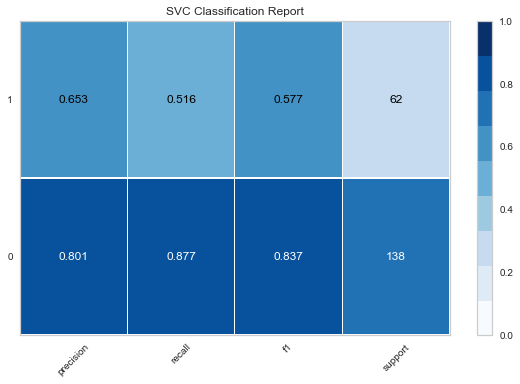

In [62]:
classes = [0,1]
visualizer2 = ClassificationReport(svm_clf, classes=classes, support=True,cmap='Blues')
visualizer2.fit(X_train, y_train)
visualizer2.score(X_test, y_test)
visualizer2.show()

## Bootstrap - Making New Dataset

### Bootstrap 100 iterations

In [63]:
values = transform_data_clean.values
n_iterations = 100
n_size = int(len(transform_data_clean))
for i in range(n_iterations):
    bs100 = resample(values, replace=True, n_samples=n_size,random_state=15)
    bs100_df = pd.DataFrame(bs100, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [64]:
transform_data_clean.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
5,36,9055,2,4,35,1,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0
6,24,2835,3,4,53,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
7,36,6948,2,2,35,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
8,12,3059,2,4,61,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
9,30,5234,4,2,28,2,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0


In [65]:
bs100_df.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202,classification
0,11,3905,2,2,36,2,2,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
1,15,1271,3,4,39,2,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0
2,15,3594,1,2,46,2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,36,7980,4,4,27,2,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0
4,48,15672,2,2,23,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
5,30,4272,2,2,26,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
6,9,1288,3,4,48,2,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
7,48,3609,1,1,27,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
8,18,4297,4,3,40,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0
9,30,7596,1,4,63,2,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0


In [66]:
bs100_df.to_csv('bs100_wn.csv', index = True, header=True)

In [67]:
bs100_mm = pd.DataFrame(min_max_scaler.fit_transform(bs100_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 
                                                               'classification']]))
bs100_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [68]:
bs100_mm.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
0,0.102941,0.199967,0.333333,0.333333,0.303571,0.333333,1.0,0.0
1,0.161765,0.054827,0.666667,1.000000,0.357143,0.333333,0.0,0.0
2,0.161765,0.182830,0.000000,0.333333,0.482143,0.333333,0.0,0.0
3,0.470588,0.424510,1.000000,1.000000,0.142857,0.333333,0.0,0.0
4,0.647059,0.848358,0.333333,0.333333,0.071429,0.000000,0.0,0.0
5,0.382353,0.220190,0.333333,0.333333,0.125000,0.333333,0.0,0.0
6,0.073529,0.055764,0.666667,1.000000,0.517857,0.333333,1.0,1.0
7,0.647059,0.183657,0.000000,0.000000,0.142857,0.000000,0.0,0.0
8,0.205882,0.221567,1.000000,0.666667,0.375000,0.000000,0.0,0.0
9,0.382353,0.403350,0.000000,1.000000,0.785714,0.333333,0.0,0.0


In [69]:
bs100_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [70]:
bs100_df.head(10)

,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1
2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1
6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
7,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
8,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1
9,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1


In [71]:
tbs100 = pd.concat([bs100_mm,bs100_df],axis=1)

In [72]:
tbs100.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.244691,0.165020,0.672667,0.621667,0.294107,0.144000,0.170000,0.033000,0.282000,0.26400,0.270000,0.059000,0.407000,0.044000,0.048000,0.529000,0.095000,0.284000,0.223000,0.10000,0.005000,0.174000,0.287000,0.008000,0.02000,0.060000,0.010000,0.113000,0.598000,0.096000,0.065000,0.056000,0.185000,0.056000,0.186000,0.336000,0.162000,0.260000,0.047000,0.311000,0.555000,0.087000,0.919000,0.033000,0.048000,0.268000,0.226000,0.341000,0.165000,0.141000,0.055000,0.804000,0.188000,0.68300,0.129000,0.019000,0.197000,0.639000,0.145000,0.588000,0.412000,0.967000
std,0.178172,0.154089,0.375195,0.368782,0.208389,0.200482,0.375821,0.178726,0.450198,0.44102,0.444182,0.235743,0.491521,0.205198,0.213873,0.499408,0.293362,0.451162,0.416467,0.30015,0.070569,0.379299,0.452588,0.089129,0.14007,0.237606,0.099549,0.316751,0.490547,0.294739,0.246649,0.230037,0.388492,0.230037,0.389301,0.472575,0.368635,0.438854,0.211745,0.463134,0.497214,0.281976,0.272972,0.178726,0.213873,0.443139,0.418448,0.474283,0.371366,0.348196,0.228094,0.397167,0.390908,0.46554,0.335368,0.136593,0.397931,0.480531,0.352277,0.492441,0.492441,0.178726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.058712,0.333333,0.333333,0.125000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.205882,0.112712,1.000000,0.666667,0.2500

In [73]:
pd.set_option('max_columns', None)
tbs100.describe().to_excel('bs100_s.xlsx',index=True, header=True)

In [74]:
tbs100.classification.value_counts()

0.0    967
1.0     33
Name: classification, dtype: int64

In [75]:
tbs100.to_csv('bs100_n.csv', index = True, header=True)

In [76]:
X1 = tbs100.drop('classification', axis = 1)
y1 = tbs100['classification']

In [77]:
bs100lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs100lr.fit(X1,y1)
bs100_pred = bs100lr.predict(X_test)

## LR prediction probability

In [78]:
accu3 = accuracy_score(y_test, bs100_pred)
print("accuracy_score : ",accu3)

accuracy_score :  0.44


## Confusion Matrix

In [79]:
cfm_3 = confusion_matrix(y_test, bs100_pred)
print(cfm_3)

[[44 94]
 [18 44]]


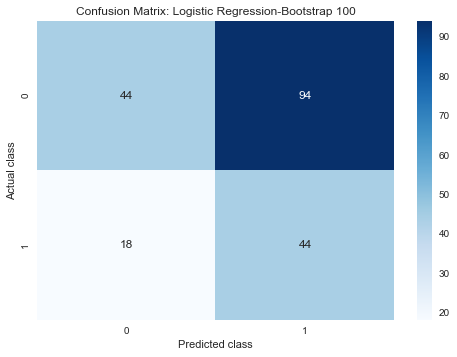

In [80]:
sns.heatmap(cfm_3, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 100')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs100.png')

## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


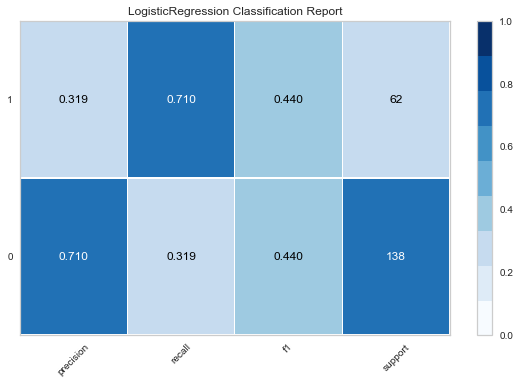

In [81]:
visualizer3 = ClassificationReport(bs100lr, classes=classes, support=True,cmap='Blues')
visualizer3.fit(X1, y1)
visualizer3.score(X_test, y_test)
visualizer3.show()

## SVM (linear kernel function)

In [82]:
svm_clf_2 = SVC(kernel='linear', probability=True)

In [83]:
svm_clf_2.fit(X1,y1)
bs100_pred2 = svm_clf_2.predict(X_test)

## SVM prediction probability

In [84]:
accu4 = accuracy_score(y_test, bs100_pred2)
print("accuracy_score : ",accu4)

accuracy_score :  0.345


## Confusion Matrix

In [85]:
cfm_4 = confusion_matrix(y_test, bs100_pred2)
print (cfm_4)

[[  7 131]
 [  0  62]]


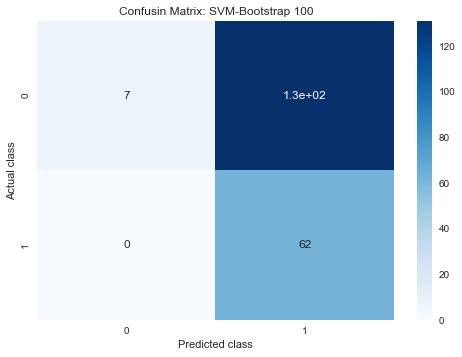

In [86]:
sns.heatmap(cfm_4, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 100')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs100.png')

## SVM Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


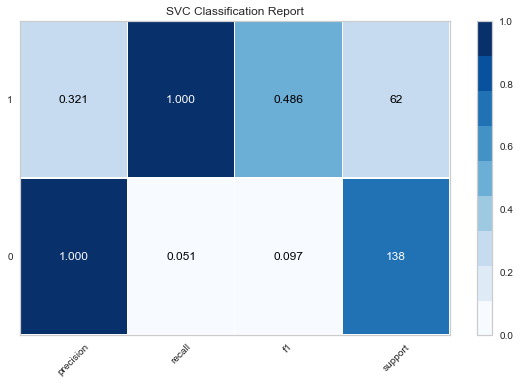

In [87]:
visualizer4 = ClassificationReport(svm_clf_2, classes=classes, support=True,cmap='Blues')
visualizer4.fit(X1, y1)
visualizer4.score(X_test, y_test)
visualizer4.show()

## Bootstrap 1000 iterations

In [88]:
values2 = transform_data_clean.values
n_iterations_2 = 1000
n_size_2 = int(len(transform_data_clean))
for i in range(n_iterations_2):
    bs1000 = resample(values2, replace=True, n_samples=n_size_2, random_state=20)
    bs1000_df = pd.DataFrame(bs1000, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [89]:
bs1000_df.to_csv('bs1000_wn.csv', index = True, header=True)

In [90]:
bs1000_mm = pd.DataFrame(min_max_scaler.fit_transform(bs1000_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))
bs1000_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [91]:
bs1000_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [92]:
tbs1000 = pd.concat([bs1000_mm,bs1000_df],axis=1)

In [93]:
tbs1000.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.245397,0.165897,0.655000,0.598000,0.278727,0.131000,0.155000,0.04200,0.279000,0.263000,0.281000,0.071000,0.385000,0.037000,0.048000,0.509000,0.108000,0.298000,0.218000,0.104000,0.013000,0.17700,0.286000,0.019000,0.021000,0.043000,0.009000,0.110000,0.59400,0.096000,0.060000,0.06100,0.189000,0.051000,0.174000,0.365000,0.18000,0.230000,0.064000,0.299000,0.532000,0.105000,0.910000,0.028000,0.062000,0.281000,0.263000,0.309000,0.147000,0.152000,0.04600,0.802000,0.195000,0.703000,0.1020,0.027000,0.198000,0.637000,0.138000,0.595000,0.405000,0.95800
std,0.178811,0.154842,0.370737,0.367390,0.200101,0.187637,0.362086,0.20069,0.448732,0.440483,0.449712,0.256953,0.486839,0.188856,0.213873,0.500169,0.310536,0.457608,0.413094,0.305413,0.113331,0.38186,0.452115,0.136593,0.143456,0.202959,0.094488,0.313046,0.49133,0.294739,0.237606,0.23945,0.391705,0.220108,0.379299,0.481671,0.38438,0.421043,0.244875,0.458049,0.499225,0.306707,0.286325,0.165055,0.241276,0.449712,0.440483,0.462312,0.354283,0.359201,0.20959,0.398692,0.396399,0.457165,0.3028,0.162164,0.398692,0.481105,0.345073,0.491138,0.491138,0.20069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.117647,0.061737,0.333333,0.333333,0.127273,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,0.205882,0.114394,0.666667,0.666667,0.236364,0.000000,0.000000,0.00

In [94]:
pd.set_option('max_columns', None)
tbs1000.describe().to_excel('bs1000_s.xlsx',index=True, header=True)

In [95]:
tbs1000.classification.value_counts()

0.0    958
1.0     42
Name: classification, dtype: int64

In [96]:
tbs1000.to_csv('bs1000_n.csv', index = True, header=True)

In [97]:
X2 = tbs1000.drop('classification', axis = 1)
y2 = tbs1000['classification']

In [98]:
bs1000lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs1000lr.fit(X2,y2)
bs1000_pred = bs1000lr.predict(X_test)

## LR prediction probability

In [99]:
accu5 = accuracy_score(y_test, bs1000_pred)
print("accuracy_score : ",accu5)

accuracy_score :  0.395


## Confusion Matrix

In [100]:
cfm_5 = confusion_matrix(y_test, bs1000_pred)
print (cfm_5)

[[ 25 113]
 [  8  54]]


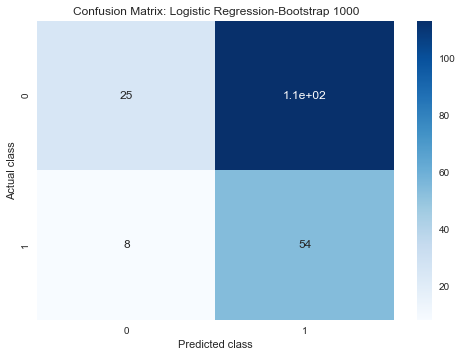

In [101]:
sns.heatmap(cfm_5, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 1000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs1000.png')

## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


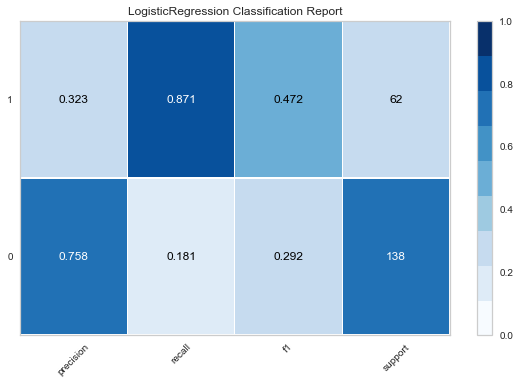

In [102]:
visualizer5 = ClassificationReport(bs1000lr, classes=classes, support=True,cmap='Blues')
visualizer5.fit(X2, y2)
visualizer5.score(X_test, y_test)
visualizer5.show()

## SVM (linear kernel function)

In [103]:
svm_clf_3 = SVC(kernel='linear', probability=True)

In [104]:
svm_clf_3.fit(X2,y2)
bs1000_pred2 = svm_clf_3.predict(X_test)

## SVM prediction probability

In [105]:
accu6 = accuracy_score(y_test, bs1000_pred2)
print("accuracy_score : ",accu6)

accuracy_score :  0.345


## Confusion Matrix

In [106]:
cfm_6 = confusion_matrix(y_test, bs1000_pred2)
print (cfm_6)

[[  7 131]
 [  0  62]]


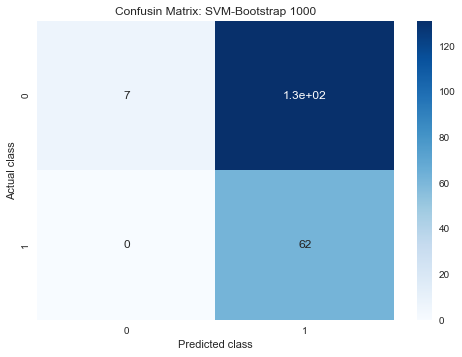

In [107]:
sns.heatmap(cfm_6, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 1000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs1000.png')

## SVM Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


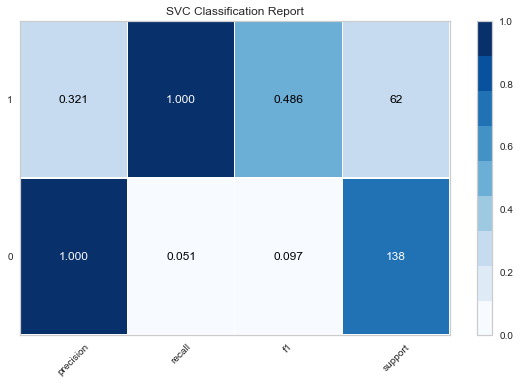

In [108]:
visualizer6 = ClassificationReport(svm_clf_3, classes=classes, support=True,cmap='Blues')
visualizer6.fit(X2, y2)
visualizer6.score(X_test, y_test)
visualizer6.show()

## Bootstrap 5000 iterations

In [109]:
values3 = transform_data_clean.values
n_iterations_3 = 5000
n_size_3 = 1000
for i in range(n_iterations_3):
    bs5000 = resample(values3, replace=True, n_samples=n_size_3,random_state=25)
    bs5000_df = pd.DataFrame(bs5000, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [110]:
bs5000_df.to_csv('bs5000_wn.csv', index = True, header=True)

In [111]:
bs5000_mm = pd.DataFrame(min_max_scaler.fit_transform(bs5000_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))
bs5000_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [112]:
bs5000_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [113]:
tbs5000 = pd.concat([bs5000_mm,bs5000_df],axis=1)

In [114]:
tbs5000.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.250691,0.164662,0.649000,0.617667,0.294691,0.129333,0.156000,0.035000,0.312000,0.293000,0.254000,0.064000,0.389000,0.049000,0.057000,0.541000,0.091000,0.262000,0.20800,0.089000,0.01200,0.199000,0.280000,0.014000,0.026000,0.056000,0.009000,0.107000,0.61800,0.098000,0.055000,0.036000,0.19300,0.050000,0.196000,0.339000,0.169000,0.246000,0.06100,0.314000,0.543000,0.082000,0.929000,0.026000,0.045000,0.281000,0.223000,0.344000,0.152000,0.147000,0.060000,0.793000,0.184000,0.70800,0.108000,0.019000,0.222000,0.624000,0.135000,0.599000,0.401000,0.965000
std,0.183344,0.153218,0.381736,0.372176,0.203103,0.193158,0.363037,0.183872,0.463542,0.455366,0.435515,0.244875,0.487767,0.215976,0.231959,0.498566,0.287753,0.439943,0.40608,0.284886,0.10894,0.399448,0.449224,0.117549,0.159215,0.230037,0.094488,0.309268,0.48612,0.297463,0.228094,0.186383,0.39485,0.218054,0.397167,0.473607,0.374939,0.430894,0.23945,0.464349,0.498397,0.274502,0.256953,0.159215,0.207408,0.449712,0.416467,0.475279,0.359201,0.354283,0.237606,0.405358,0.387678,0.45491,0.310536,0.136593,0.415799,0.484622,0.341895,0.490346,0.490346,0.183872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.060691,0.333333,0.333333,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.205882,0.109937,0.666667,0.666667,0.236364,0.00000

In [115]:
pd.set_option('max_columns', None)
tbs5000.describe().to_excel('bs5000_s.xlsx',index=True, header=True)

In [116]:
tbs5000.classification.value_counts()

0.0    965
1.0     35
Name: classification, dtype: int64

In [117]:
tbs5000.to_csv('bs5000_n.csv', index = True, header=True)

In [118]:
X3 = tbs5000.drop('classification', axis = 1)
y3 = tbs5000['classification']

In [119]:
bs5000lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs5000lr.fit(X3,y3)
bs5000_pred = bs5000lr.predict(X_test)

## LR prediction probability

In [120]:
accu7 = accuracy_score(y_test, bs5000_pred)
print("accuracy_score : ",accu7)

accuracy_score :  0.425


## Confusion Matrix

In [121]:
cfm_7 = confusion_matrix(y_test, bs5000_pred)
print (cfm_7)

[[45 93]
 [22 40]]


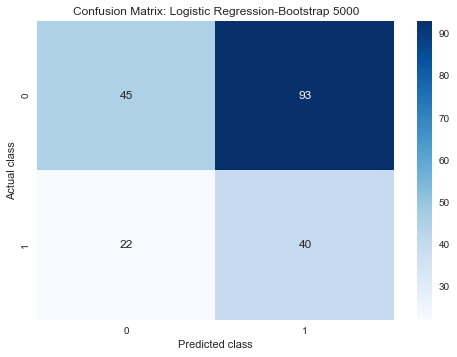

In [122]:
sns.heatmap(cfm_7, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 5000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs5000.png')

## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


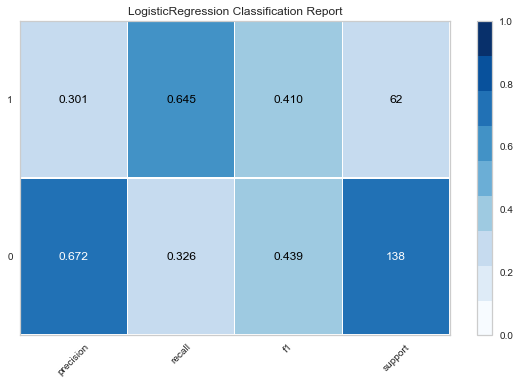

In [123]:
visualizer7 = ClassificationReport(bs5000lr, classes=classes, support=True,cmap='Blues')
visualizer7.fit(X3, y3)
visualizer7.score(X_test, y_test)
visualizer7.show()

## SVM (linear kernel function)

In [124]:
svm_clf_4 = SVC(kernel='linear', probability=True)

In [125]:
svm_clf_4.fit(X3,y3)
bs5000_pred2 = svm_clf_4.predict(X_test)

## SVM prediction probability

In [126]:
accu8 = accuracy_score(y_test, bs5000_pred2)
print("accuracy_score : ",accu8)

accuracy_score :  0.345


## Confusion Matrix

In [127]:
cfm_8 = confusion_matrix(y_test, bs5000_pred2)
print (cfm_8)

[[  7 131]
 [  0  62]]


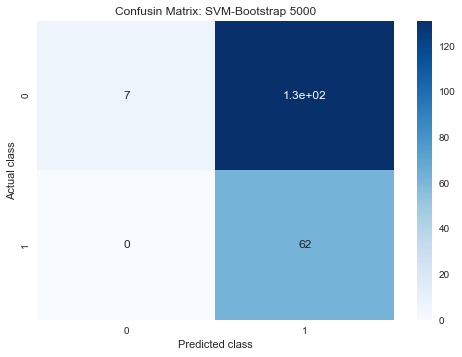

In [128]:
sns.heatmap(cfm_8, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 5000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs5000.png')

## SVM Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


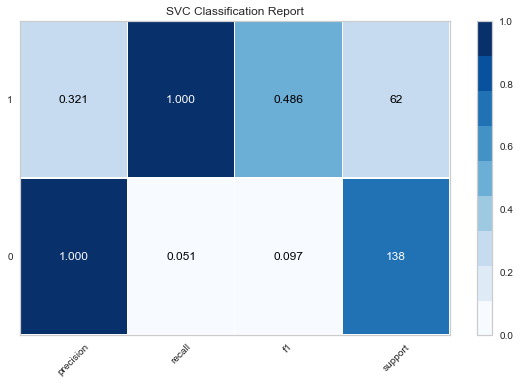

In [129]:
visualizer8 = ClassificationReport(svm_clf_4, classes=classes, support=True,cmap='Blues')
visualizer8.fit(X3, y3)
visualizer8.score(X_test, y_test)
visualizer8.show()

## Bootstrap 10,000 iterations

In [130]:
values4 = transform_data_clean.values
n_iterations_4 = 10000
n_size_4 = 1000
for i in range(n_iterations_4):
    bs10000 = resample(values4, replace=True, n_samples=n_size_4, random_state=30)
    bs10000_df = pd.DataFrame(bs10000, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [131]:
bs10000_df.to_csv('bs10000_wn.csv', index = True, header=True)

In [132]:
bs10000_mm = pd.DataFrame(min_max_scaler.fit_transform(bs10000_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))
bs10000_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [133]:
bs10000_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [134]:
tbs10000 = pd.concat([bs10000_mm,bs10000_df],axis=1)

In [135]:
tbs10000.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.245250,0.162455,0.654333,0.640000,0.298107,0.132667,0.158000,0.035000,0.286000,0.262000,0.260000,0.067000,0.411000,0.050000,0.056000,0.524000,0.095000,0.275000,0.253000,0.104000,0.013000,0.172000,0.270000,0.011000,0.01200,0.05800,0.010000,0.097000,0.615000,0.108000,0.059000,0.040000,0.178000,0.080000,0.18300,0.311000,0.156000,0.270000,0.049000,0.338000,0.532000,0.081000,0.909000,0.044000,0.047000,0.268000,0.237000,0.347000,0.148000,0.135000,0.049000,0.816000,0.18000,0.719000,0.10100,0.025000,0.203000,0.610000,0.162000,0.599000,0.401000,0.965000
std,0.174928,0.152979,0.374298,0.364356,0.207536,0.197187,0.364924,0.183872,0.452115,0.439943,0.438854,0.250147,0.492261,0.218054,0.230037,0.499674,0.293362,0.446738,0.434948,0.305413,0.113331,0.377569,0.444182,0.104355,0.10894,0.23386,0.099549,0.296106,0.486839,0.310536,0.235743,0.196057,0.382704,0.271429,0.38686,0.463134,0.363037,0.444182,0.215976,0.473265,0.499225,0.272972,0.287753,0.205198,0.211745,0.443139,0.425455,0.476254,0.355278,0.341895,0.215976,0.387678,0.38438,0.449712,0.30148,0.156203,0.402434,0.487994,0.368635,0.490346,0.490346,0.183872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.062348,0.333333,0.333333,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.205882,0.112602,0.666667,0.666667,0.250000,0.

In [136]:
pd.set_option('max_columns', None)
tbs10000.describe().to_excel('bs10000_s.xlsx',index=True, header=True)

In [137]:
tbs10000.classification.value_counts()

0.0    965
1.0     35
Name: classification, dtype: int64

In [138]:
tbs10000.to_csv('bs10000_n.csv', index = True, header=True)

In [139]:
X4 = tbs10000.drop('classification', axis = 1)
y4 = tbs10000['classification']

In [140]:
bs10000lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs10000lr.fit(X4,y4)
bs10000_pred = bs10000lr.predict(X_test)

## LR prediction probability

In [141]:
accu9 = accuracy_score(y_test, bs10000_pred)
print("accuracy_score : ",accu9)

accuracy_score :  0.545


## Confusion Matrix

In [142]:
cfm_9 = confusion_matrix(y_test, bs10000_pred)
print (cfm_9)

[[87 51]
 [40 22]]


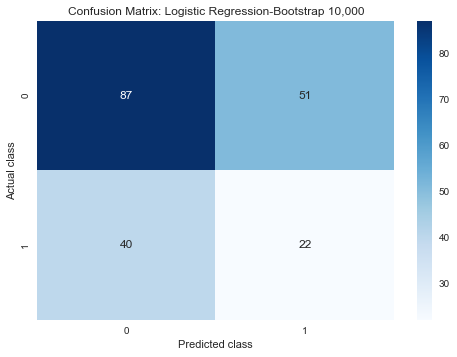

In [143]:
sns.heatmap(cfm_9, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 10,000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs10000.png')

## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


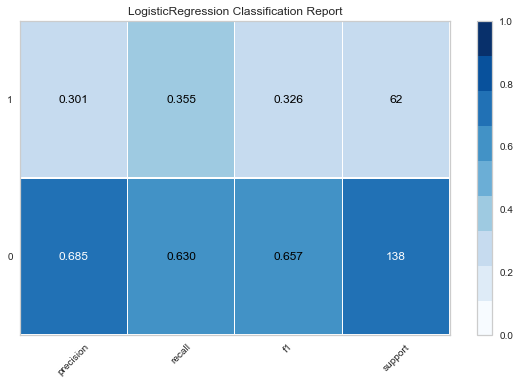

In [144]:
visualizer9 = ClassificationReport(bs10000lr, classes=classes, support=True,cmap='Blues')
visualizer9.fit(X4, y4)
visualizer9.score(X_test, y_test)
visualizer9.show()

## SVM (linear kernel function)

In [145]:
svm_clf_5 = SVC(kernel='linear', probability=True)

In [146]:
svm_clf_5.fit(X4,y4)
bs10000_pred2 = svm_clf_5.predict(X_test)

## SVM prediction probability

In [147]:
accu10 = accuracy_score(y_test, bs10000_pred2)
print("accuracy_score : ",accu10)

accuracy_score :  0.345


## Confusion Matrix

In [148]:
cfm_10 = confusion_matrix(y_test, bs10000_pred2)
print (cfm_10)

[[  7 131]
 [  0  62]]


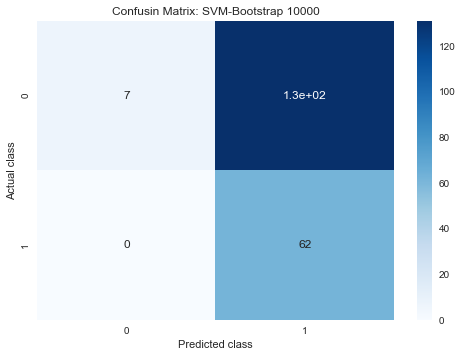

In [149]:
sns.heatmap(cfm_10, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 10000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs10000.png')

## SVM Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


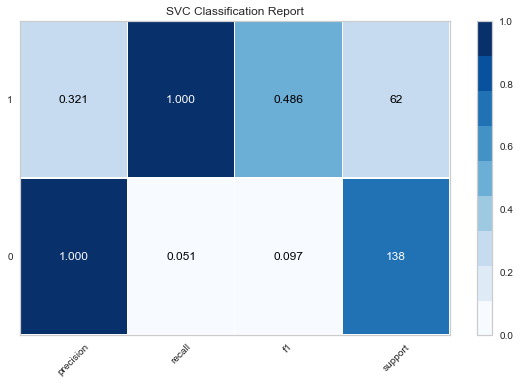

In [150]:
visualizer10 = ClassificationReport(svm_clf_5, classes=classes, support=True,cmap='Blues')
visualizer10.fit(X4, y4)
visualizer10.score(X_test, y_test)
visualizer10.show()

## Bootstrap 10,000 iterations - 50%

In [151]:
values5 = transform_data_clean.values
n_iterations_5 = 10000
n_size_5 = int(len(transform_data_clean) * 0.50)
for i in range(n_iterations_5):
    bs10000_05 = resample(values5, replace=True, n_samples=n_size_5, random_state=35)
    bs10000_05_df = pd.DataFrame(bs10000_05, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [152]:
bs10000_05_df.to_csv('bs10000_0.5_wn.csv', index = True, header=True)

In [153]:
bs10000_05_mm = pd.DataFrame(min_max_scaler.fit_transform(bs10000_05_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))
bs10000_05_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [154]:
bs10000_05_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [155]:
tbs10000_05 = pd.concat([bs10000_05_mm,bs10000_05_df],axis=1)

In [156]:
tbs10000_05.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.305536,0.169591,0.674000,0.606667,0.292582,0.151333,0.164000,0.056000,0.312000,0.238000,0.284000,0.054000,0.424000,0.04200,0.044000,0.500000,0.086000,0.328000,0.24600,0.090000,0.014000,0.184000,0.266000,0.012000,0.014000,0.080000,0.010000,0.084000,0.616000,0.086000,0.068000,0.046000,0.184000,0.062000,0.140000,0.354000,0.180000,0.264000,0.036000,0.284000,0.588000,0.092000,0.906000,0.046000,0.04800,0.266000,0.286000,0.274000,0.174000,0.138000,0.044000,0.818000,0.126000,0.744000,0.13000,0.02200,0.212000,0.626000,0.140000,0.588000,0.412000,0.944000
std,0.224943,0.176058,0.357743,0.364843,0.200999,0.199053,0.370646,0.230152,0.463774,0.426286,0.451388,0.226244,0.494685,0.20079,0.205301,0.500501,0.280645,0.469955,0.43111,0.286468,0.117608,0.387872,0.442307,0.108994,0.117608,0.271565,0.099598,0.277666,0.486845,0.280645,0.251998,0.209695,0.387872,0.241397,0.347335,0.478688,0.384572,0.441241,0.186477,0.451388,0.492688,0.289315,0.292121,0.209695,0.21398,0.442307,0.452342,0.446456,0.379489,0.345245,0.205301,0.386231,0.332182,0.436859,0.33664,0.14683,0.409134,0.484348,0.347335,0.492688,0.492688,0.230152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.054351,0.333333,0.333333,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.250000,0.103201,0.666667,0.666667,0.236364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [157]:
pd.set_option('max_columns', None)
tbs10000_05.describe().to_excel('bs10000_0.5_s.xlsx',index=True, header=True)

In [158]:
tbs10000_05.classification.value_counts()

0.0    472
1.0     28
Name: classification, dtype: int64

In [159]:
tbs10000_05.to_csv('bs10000_05_n.csv', index = True, header=True)

In [160]:
X5 = tbs10000_05.drop('classification', axis = 1)
y5 = tbs10000_05['classification']

In [161]:
bs10000_05lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs10000_05lr.fit(X5,y5)
bs10000_05_pred = bs10000_05lr.predict(X_test)

## LR prediction probability

In [162]:
accu11 = accuracy_score(y_test, bs10000_05_pred)
print("accuracy_score : ",accu11)

accuracy_score :  0.51


## Confusion Matrix

In [163]:
cfm_11 = confusion_matrix(y_test, bs10000_05_pred)
print (cfm_11)

[[72 66]
 [32 30]]


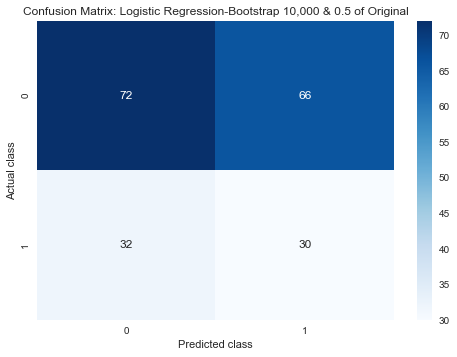

In [164]:
sns.heatmap(cfm_11, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 10,000 & 0.5 of Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs10000_05.png')

## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


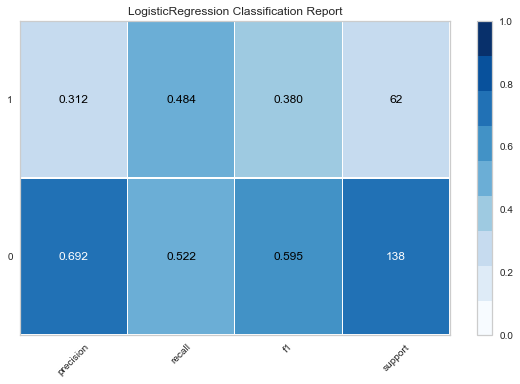

In [165]:
visualizer11 = ClassificationReport(bs10000_05lr, classes=classes, support=True,cmap='Blues')
visualizer11.fit(X5, y5)
visualizer11.score(X_test, y_test)
visualizer11.show()

## SVM (linear kernel function)

In [166]:
svm_clf_6 = SVC(kernel='linear', probability=True)

In [167]:
svm_clf_6.fit(X5,y5)
bs10000_05_pred_2 = svm_clf_6.predict(X_test)

## SVM prediction probability

In [168]:
accu12 = accuracy_score(y_test, bs10000_05_pred_2)
print("accuracy_score : ",accu12)

accuracy_score :  0.345


## Confusion Matrix

In [169]:
cfm_12 = confusion_matrix(y_test, bs10000_05_pred_2)
print (cfm_12)

[[  7 131]
 [  0  62]]


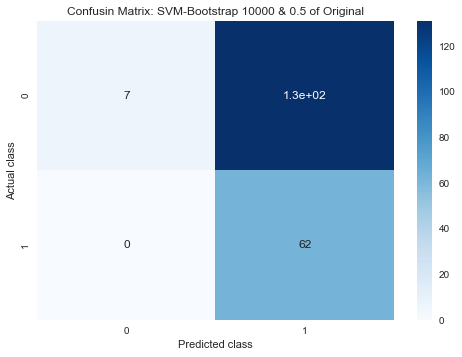

In [170]:
sns.heatmap(cfm_12, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 10000 & 0.5 of Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs10000_05.png')

## SVM Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


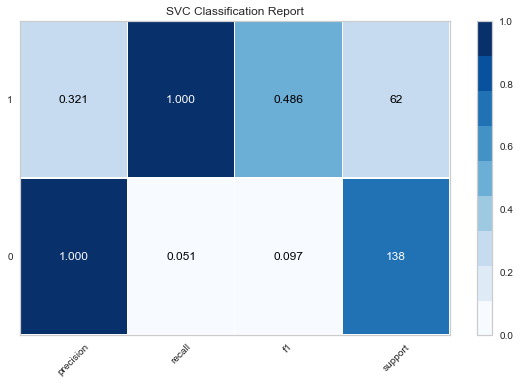

In [171]:
visualizer12 = ClassificationReport(svm_clf_6, classes=classes, support=True,cmap='Blues')
visualizer12.fit(X5, y5)
visualizer12.score(X_test, y_test)
visualizer12.show()

## Random Oversampling the minority class from the original dataset

In [172]:
ov_raw = transform_data_clean.copy()

## Seperate Minority & Majority class

In [173]:
bad_credit = ov_raw[ov_raw.classification==1]
good_credit = ov_raw[ov_raw.classification==0]

In [174]:
bad_credit.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
1,48,5951,2,2,22,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
9,30,5234,4,2,28,2,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0
10,12,1295,3,1,25,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
11,48,4308,3,4,24,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
13,24,1199,4,4,60,2,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
15,24,1282,4,2,32,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
18,24,12579,4,2,44,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0
29,60,6836,3,4,63,2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0
35,45,4746,4,2,25,2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0


In [175]:
bad_credit_oversample = resample(bad_credit, replace=True, n_samples=len(good_credit))

In [176]:
oversample = pd.concat([good_credit,bad_credit_oversample])

In [177]:
oversample.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
2,12,2096,2,3,49,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
5,36,9055,2,4,35,1,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0
6,24,2835,3,4,53,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0


In [179]:
oversample.to_csv('ov_wn.csv', index = True, header=True)

1    700
0    700
Name: classification, dtype: int64


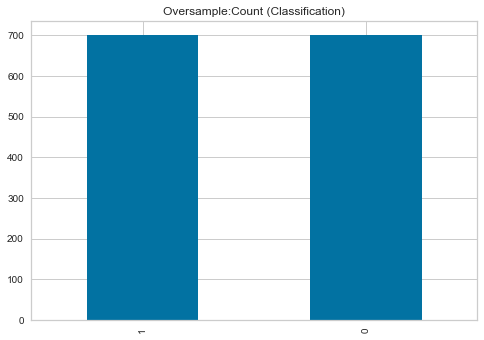

In [180]:
oversample.classification.value_counts().plot(kind='bar', title='Oversample:Count (Classification)')

print(oversample.classification.value_counts())

In [181]:
ov_mm = pd.DataFrame(min_max_scaler.fit_transform(oversample[['duration', 'creditamount','installmentrate', 
                                                              'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]),
                                                 index=oversample.index)
ov_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [182]:
oversample.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [183]:
ov_mm.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
0,0.035714,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.0
2,0.142857,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0
3,0.678571,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0
5,0.571429,0.484483,0.333333,1.000000,0.285714,0.000000,1.0,0.0
6,0.357143,0.142236,0.666667,1.000000,0.607143,0.000000,0.0,0.0


In [184]:
ov_df = pd.concat([ov_mm, oversample],axis=1)

In [185]:
ov_df.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.321441,0.178179,0.660238,0.612143,0.286148,0.130476,0.155714,0.500000,0.329286,0.300000,0.059286,0.311429,0.050000,0.067143,0.531429,0.092143,0.259286,0.263571,0.087143,0.012143,0.181429,0.254286,0.016429,0.019286,0.050000,0.007857,0.107857,0.639286,0.105000,0.058571,0.035714,0.161429,0.072143,0.189286,0.341429,0.160714,0.236429,0.055000,0.320714,0.537143,0.087143,0.900714,0.052857,0.046429,0.242143,0.249286,0.332857,0.175714,0.151429,0.058571,0.790000,0.197143,0.690000,0.112857,0.020714,0.202143,0.633571,0.143571,0.605714,0.394286,0.967143,0.032857
std,0.223928,0.170053,0.372009,0.368045,0.204532,0.189364,0.362714,0.500179,0.470122,0.458421,0.236243,0.463243,0.218023,0.250359,0.499190,0.289331,0.438399,0.440727,0.282145,0.109563,0.385511,0.435615,0.127162,0.137577,0.218023,0.088323,0.310311,0.480379,0.306663,0.234905,0.185643,0.368057,0.258817,0.391875,0.474358,0.367398,0.425040,0.228062,0.466918,0.498797,0.282145,0.299152,0.223828,0.210487,0.428533,0.432754,0.471404,0.380713,0.358594,0.234905,0.407454,0.397983,0.462659,0.316531,0.142477,0.401742,0.482001,0.350780,0.488871,0.488871,0.178326,0.178326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.060251,0.333333,0.333333,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.250000,0.115385,0.66

In [186]:
pd.set_option('max_columns', None)
ov_df.describe().to_excel('ov_s.xlsx',index=True, header=True)

In [187]:
ov_df.classification.value_counts()

1.0    700
0.0    700
Name: classification, dtype: int64

In [188]:
ov_df.to_csv('ov_n.csv', index = True, header=True)

In [189]:
X6 = ov_df.drop('classification', axis = 1)
y6 = ov_df['classification']

In [190]:
ovlr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
ovlr.fit(X6,y6)
ov_pred = ovlr.predict(X_test)

## LR prediction probability

In [191]:
accu13 = accuracy_score(y_test, ov_pred)
print("accuracy_score : ",accu13)

accuracy_score :  0.765


## Confusion Matrix

In [192]:
cfm_13 = confusion_matrix(y_test, ov_pred)
print (cfm_13)

[[106  32]
 [ 15  47]]


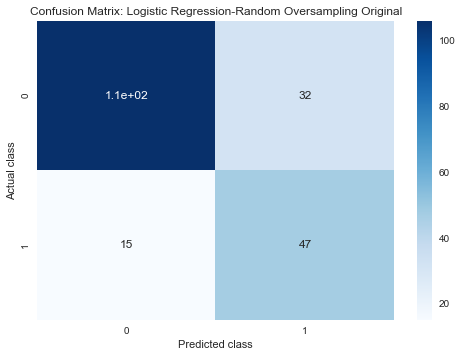

In [193]:
sns.heatmap(cfm_13, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Random Oversampling Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_ov.png')

## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


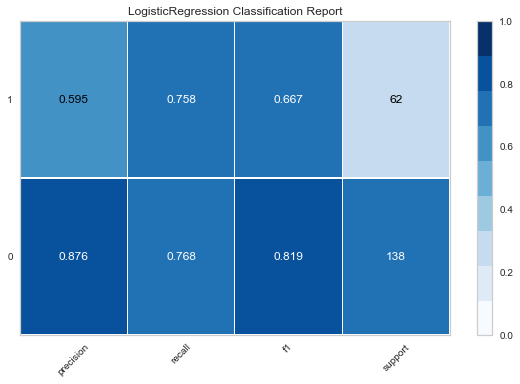

In [194]:
visualizer13 = ClassificationReport(ovlr, classes=classes, support=True,cmap='Blues')
visualizer13.fit(X6, y6)
visualizer13.score(X_test, y_test)
visualizer13.show()

## SVM (linear kernel function)

In [195]:
svm_clf_7 = SVC(kernel='linear', probability=True)

In [196]:
svm_clf_7.fit(X6,y6)
ov_pred2 = svm_clf_7.predict(X_test)

## SVM prediction probability

In [197]:
accu14 = accuracy_score(y_test, ov_pred2)
print("accuracy_score : ",accu14)

accuracy_score :  0.79


## Confusion Matrix

In [198]:
cfm_14 = confusion_matrix(y_test, ov_pred2)
print (cfm_14)

[[110  28]
 [ 14  48]]


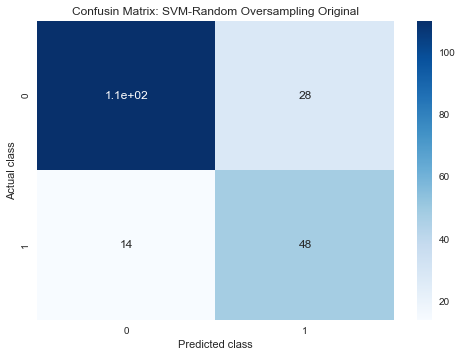

In [199]:
sns.heatmap(cfm_14, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Random Oversampling Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_over.png')

## SVM Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


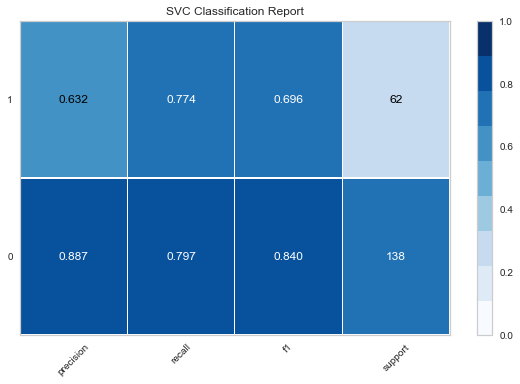

In [200]:
visualizer14 = ClassificationReport(svm_clf_7, classes=classes, support=True,cmap='Blues')
visualizer14.fit(X6, y6)
visualizer14.score(X_test, y_test)
visualizer14.show()

## Undersampling the majority class from the Original

In [201]:
u_raw = transform_data_clean.copy()

## Seperate Minority & Majority class

In [202]:
bad_credit2 = u_raw[u_raw.classification==1]
good_credit2 = u_raw[u_raw.classification==0]

In [203]:
good_credit_undersample = resample(good_credit2, replace=True, n_samples=len(bad_credit2))

In [204]:
undersample = pd.concat([good_credit_undersample,bad_credit2])

In [205]:
undersample.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
363,6,1766,1,2,21,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
259,11,1154,4,4,57,3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
804,12,7472,1,2,24,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
484,12,1163,4,4,44,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
795,9,2301,2,4,22,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0


In [207]:
undersample.to_csv('under_wn.csv', index = True, header=True)

1    300
0    300
Name: classification, dtype: int64


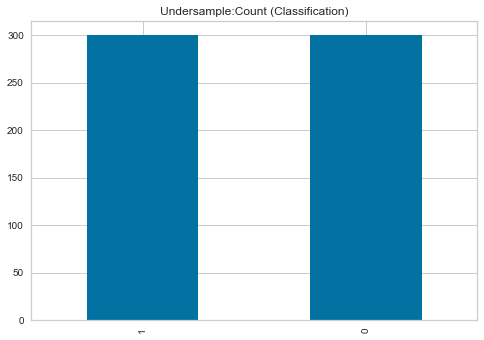

In [208]:
undersample.classification.value_counts().plot(kind='bar', title='Undersample:Count (Classification)')

print(undersample.classification.value_counts())

In [209]:
u_mm = pd.DataFrame(min_max_scaler.fit_transform(undersample[['duration', 'creditamount','installmentrate', 
                                                              'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]),
                                                 index=undersample.index)
u_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [210]:
undersample.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [211]:
u_mm.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
363,0.029412,0.083416,0.000000,0.333333,0.036364,0.000000,0.0,0.0
259,0.102941,0.049741,1.000000,1.000000,0.690909,0.666667,0.0,0.0
804,0.117647,0.397381,0.000000,0.333333,0.090909,0.000000,0.0,0.0
484,0.117647,0.050237,1.000000,1.000000,0.454545,0.000000,0.0,0.0
795,0.073529,0.112854,0.333333,1.000000,0.054545,0.000000,0.0,0.0


In [212]:
u_df = pd.concat([u_mm, undersample],axis=1)

In [213]:
u_df.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.266765,0.182935,0.661111,0.626111,0.294091,0.130556,0.143333,0.500000,0.340000,0.286667,0.063333,0.310000,0.043333,0.060000,0.566667,0.096667,0.233333,0.248333,0.088333,0.015000,0.198333,0.251667,0.015000,0.025000,0.056667,0.010000,0.091667,0.631667,0.113333,0.063333,0.03000,0.161667,0.071667,0.185000,0.325000,0.163333,0.255000,0.056667,0.303333,0.538333,0.101667,0.910000,0.060000,0.03000,0.248333,0.250000,0.320000,0.181667,0.148333,0.061667,0.790000,0.191667,0.671667,0.136667,0.023333,0.203333,0.611667,0.161667,0.591667,0.408333,0.975000,0.025000
std,0.186969,0.175245,0.370452,0.368516,0.205638,0.198753,0.350705,0.500417,0.474104,0.452582,0.243765,0.462879,0.203776,0.237685,0.495949,0.295750,0.423305,0.432407,0.284016,0.121654,0.399077,0.434333,0.121654,0.156255,0.231397,0.099582,0.288796,0.482755,0.317264,0.243765,0.17073,0.368452,0.258150,0.388622,0.468766,0.369978,0.436225,0.231397,0.460082,0.498944,0.302462,0.286421,0.237685,0.17073,0.432407,0.433374,0.466865,0.385891,0.355727,0.240750,0.407648,0.393941,0.469999,0.343782,0.151086,0.402814,0.487778,0.368452,0.491936,0.491936,0.156255,0.156255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.060925,0.333333,0.333333,0.127273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.205882,0.114339,0.666667,0.666667,0.254545,0.000000,0.000000,0.500000,0.000000,0.000000,0.00

In [214]:
pd.set_option('max_columns', None)
u_df.describe().to_excel('under_s.xlsx',index=True, header=True)

In [215]:
u_df.classification.value_counts()

1.0    300
0.0    300
Name: classification, dtype: int64

In [216]:
u_df.to_csv('under_n.csv', index = False, header=True)

In [217]:
X7 = u_df.drop('classification', axis = 1)
y7 = u_df['classification']

In [218]:
ulr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
ulr.fit(X7,y7)
u_pred = ulr.predict(X_test)

## LR prediction probability

In [219]:
accu15 = accuracy_score(y_test, u_pred)
print("accuracy_score : ",accu15)

accuracy_score :  0.745


## Confusion Matrix

In [220]:
cfm_15 = confusion_matrix(y_test, u_pred)
print (cfm_15)

[[102  36]
 [ 15  47]]


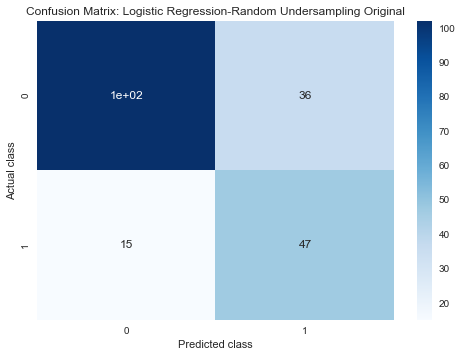

In [221]:
sns.heatmap(cfm_15, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Random Undersampling Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_u.png')

## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


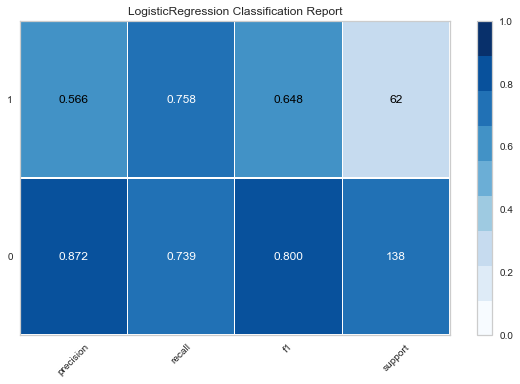

In [222]:
visualizer15 = ClassificationReport(ulr, classes=classes, support=True,cmap='Blues')
visualizer15.fit(X7, y7)
visualizer15.score(X_test, y_test)
visualizer15.show()

## SVM (linear kernel function)

In [223]:
svm_clf_8 = SVC(kernel='linear', probability=True)

In [224]:
svm_clf_8.fit(X7,y7)
u_pred2 = svm_clf_8.predict(X_test)

## SVM prediction probability

In [225]:
accu16 = accuracy_score(y_test, u_pred2)
print("accuracy_score : ",accu16)

accuracy_score :  0.775


## Confusion Matrix

In [226]:
cfm_16 = confusion_matrix(y_test, u_pred2)
print (cfm_16)

[[106  32]
 [ 13  49]]


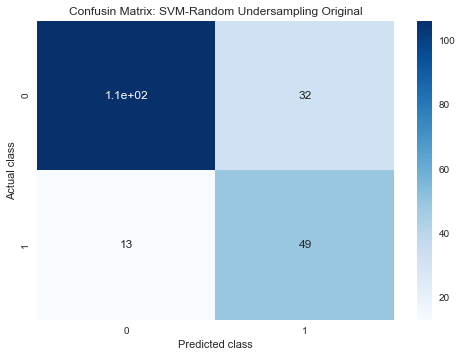

In [227]:
sns.heatmap(cfm_16, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Random Undersampling Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_under.png')

## SVM Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


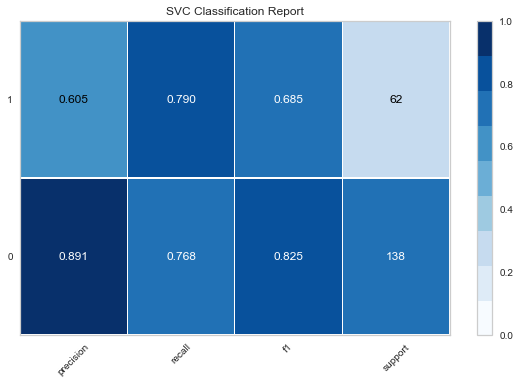

In [228]:
visualizer16 = ClassificationReport(svm_clf_8, classes=classes, support=True,cmap='Blues')
visualizer16.fit(X7, y7)
visualizer16.score(X_test, y_test)
visualizer16.show()

## Adding Noise on numercial variables to Original set

In [229]:
transform_data_clean.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000,0.274000,0.269000,0.063000,0.394000,0.040000,0.049000,0.530000,0.088000,0.293000,0.234000,0.103000,0.01200,0.181000,0.280000,0.01200,0.022000,0.050000,0.009000,0.097000,0.603000,0.103000,0.063000,0.048000,0.18300,0.062000,0.172000,0.339000,0.174000,0.253000,0.050000,0.310000,0.54800,0.092000,0.907000,0.041000,0.052000,0.282000,0.23200,0.332000,0.154000,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,0.446232,0.443662,0.243085,0.488879,0.196057,0.215976,0.499349,0.283437,0.455366,0.423584,0.304111,0.10894,0.385211,0.449224,0.10894,0.146757,0.218054,0.094488,0.296106,0.489521,0.304111,0.243085,0.213873,0.38686,0.241276,0.377569,0.473607,0.379299,0.434948,0.218054,0.462725,0.49794,0.289171,0.290578,0.198389,0.222138,0.450198,0.42232,0.471167,0.361129,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.0

In [230]:
noise = transform_data_clean.copy()

In [231]:
mean_d, std_d = 20.903000, 12.058814
mean_c, std_c = 3271.258000, 2822.736876
mean_i, std_i = 2.973000, 1.118715
mean_p, std_p = 2.845000, 1.103718
mean_a, std_a = 35.546000, 11.375469
mean_e, std_e = 1.407000, 0.577654
mean_pe, std_pe = 1.155000, 0.362086

d_noise = np.random.normal(mean_d, std_d, [1000,1])
c_noise = np.random.normal(mean_c, std_c, [1000,1])
i_noise = np.random.normal(mean_i, std_i, [1000,1])
p_noise = np.random.normal(mean_p, std_p, [1000,1])
a_noise = np.random.normal(mean_a, std_a, [1000,1])
e_noise = np.random.normal(mean_e, std_e, [1000,1])
pe_noise = np.random.normal(mean_pe, std_pe, [1000,1])

In [232]:
clean_signal_d = pd.DataFrame(data=noise, index=noise.index, columns=['duration'])
clean_signal_c = pd.DataFrame(data=noise, index=noise.index, columns=['creditamount'])
clean_signal_i = pd.DataFrame(data=noise, index=noise.index, columns=['installmentrate'])
clean_signal_p = pd.DataFrame(data=noise, index=noise.index, columns=['pre_residencesince'])
clean_signal_a = pd.DataFrame(data=noise, index=noise.index, columns=['age'])
clean_signal_e = pd.DataFrame(data=noise, index=noise.index, columns=['existingcredits'])
clean_signal_pe = pd.DataFrame(data=noise, index=noise.index, columns=['peopleliable'])

In [233]:
duration_n = clean_signal_d + d_noise
creditamount_n = clean_signal_c + c_noise
installmentrate_n = clean_signal_i + i_noise
pre_residencesince_n = clean_signal_p + p_noise
age_n = clean_signal_a + a_noise
existingcredits_n = clean_signal_e + e_noise
peopleliable_n = clean_signal_pe + pe_noise

In [234]:
noise_or = pd.concat([duration_n, creditamount_n, installmentrate_n, pre_residencesince_n, 
                           age_n,existingcredits_n,peopleliable_n],axis=1)

In [235]:
noise_or.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.453476,6683.297985,5.984825,5.680620,71.100872,2.827806,2.315436
std,16.198305,3906.499652,1.569599,1.573796,16.038494,0.812639,0.518239
min,-4.245051,-4931.618376,1.184303,0.731818,29.789690,0.687578,0.948326
25%,31.327627,4176.206003,4.958909,4.631211,59.433503,2.282504,1.960142
50%,41.292247,6369.398818,6.071635,5.747820,70.377092,2.742890,2.247928
75%,52.543466,8896.101231,7.061429,6.780930,80.925682,3.359658,2.591994
max,100.914844,22058.721004,10.859791,10.109572,136.425696,5.955892,4.160500


In [236]:
noise.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0


In [237]:
noise_or.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable
0,41.179332,8459.370971,9.078701,6.149130,105.086628,3.076230,1.960902
1,73.616594,9573.180643,5.398291,6.198431,67.095777,1.521763,2.350512
2,36.422560,4265.074030,5.220874,4.240293,81.617360,2.679011,3.326616
3,80.000727,11700.266949,3.339044,7.704599,87.031386,2.429130,2.954610
4,15.923240,9950.014780,3.808571,6.146249,81.466854,2.799149,2.879749


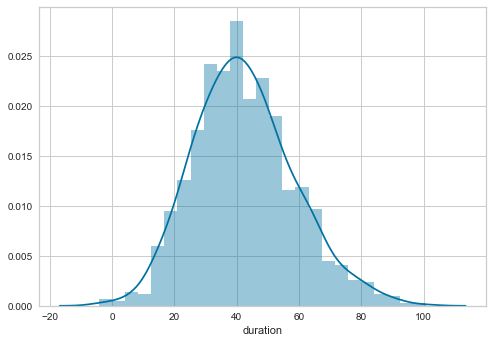

In [238]:
sns.distplot(noise_or['duration'])

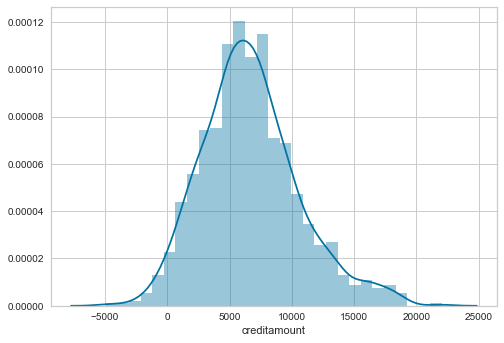

In [239]:
sns.distplot(noise_or['creditamount'])

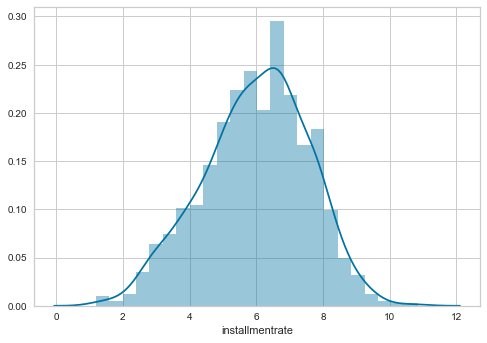

In [240]:
sns.distplot(noise_or['installmentrate'])

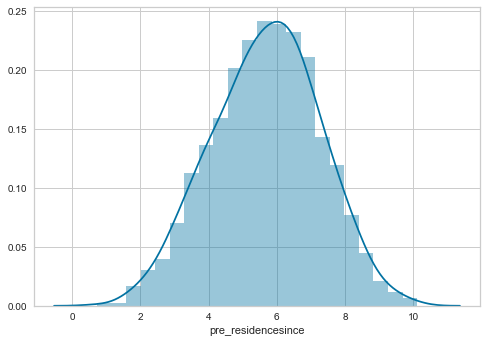

In [241]:
sns.distplot(noise_or['pre_residencesince'])

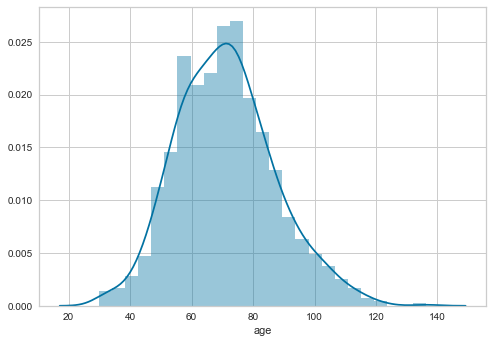

In [242]:
sns.distplot(noise_or['age'])

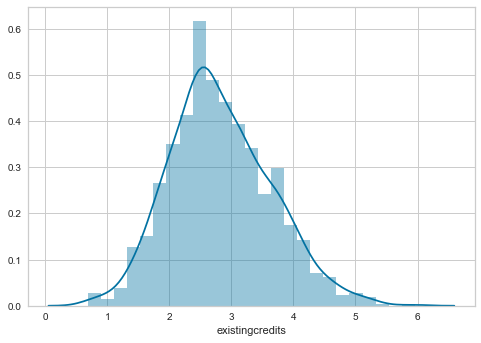

In [243]:
sns.distplot(noise_or['existingcredits'])

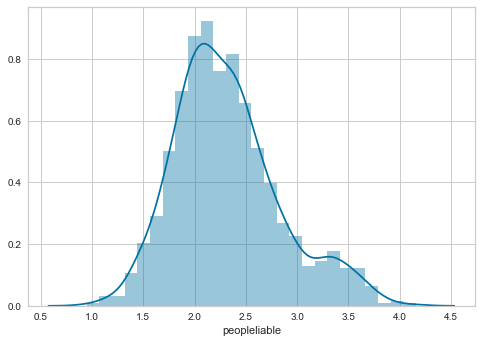

In [244]:
sns.distplot(noise_or['peopleliable'])

In [245]:
noise.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable'], axis=1, inplace=True)

In [246]:
noise_com = pd.concat([noise_or, noise],axis=1)

In [247]:
noise_com.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,41.179332,8459.370971,9.078701,6.149130,105.086628,3.076230,1.960902,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,73.616594,9573.180643,5.398291,6.198431,67.095777,1.521763,2.350512,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,36.422560,4265.074030,5.220874,4.240293,81.617360,2.679011,3.326616,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,80.000727,11700.266949,3.339044,7.704599,87.031386,2.429130,2.954610,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,15.923240,9950.014780,3.808571,6.146249,81.466854,2.799149,2.879749,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
5,54.478482,15670.500077,6.044368,6.402888,76.799957,2.811729,2.993127,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0
6,26.145217,9739.073028,5.622333,7.689476,110.715964,2.215449,2.083591,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
7,47.054532,8580.472576,4.867596,5.909068,74.979486,2.166416,2.545411,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
8,47.514247,8317.303349,2.618336,6.975036,92.374777,2.458231,1.955940,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
9,59.658278,9100.486220,7.236636,4.653186,66.722042,3.371399,2.513162,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0


In [248]:
noise_com.to_csv('noise_wn.csv', index = True, header=True)

In [249]:
n_mm = pd.DataFrame(min_max_scaler.fit_transform(noise_com[['duration', 'creditamount','installmentrate', 
                                                              'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]),
                                                 index=noise_com.index)
n_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [250]:
noise_com.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [251]:
n_mm.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
0,0.431955,0.496140,0.815917,0.577677,0.706112,0.453400,0.315231,0.0
1,0.740412,0.537407,0.435532,0.582934,0.349845,0.158340,0.436523,1.0
2,0.386722,0.340740,0.417196,0.374127,0.486024,0.378002,0.740399,0.0
3,0.801121,0.616216,0.222701,0.743545,0.536795,0.330571,0.624588,0.0
4,0.191787,0.551369,0.271228,0.577370,0.484613,0.400806,0.601282,1.0


In [252]:
n_df = pd.concat([n_mm, noise_com],axis=1)

In [253]:
n_df.to_csv('noise_n.csv', index = True, header=True)

In [254]:
n_df.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,pre_employmentsince_A71,pre_employmentsince_A72,pre_employmentsince_A73,pre_employmentsince_A74,pre_employmentsince_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.444072,0.430336,0.496153,0.527717,0.387404,0.406245,0.425603,0.300000,0.274000,0.269000,0.063000,0.394000,0.040000,0.049000,0.530000,0.088000,0.293000,0.234000,0.103000,0.01200,0.181000,0.280000,0.01200,0.022000,0.050000,0.009000,0.097000,0.603000,0.103000,0.063000,0.048000,0.18300,0.062000,0.172000,0.339000,0.174000,0.253000,0.050000,0.310000,0.54800,0.092000,0.907000,0.041000,0.052000,0.282000,0.23200,0.332000,0.154000,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,0.154035,0.144737,0.162224,0.167822,0.150404,0.154250,0.161336,0.458487,0.446232,0.443662,0.243085,0.488879,0.196057,0.215976,0.499349,0.283437,0.455366,0.423584,0.304111,0.10894,0.385211,0.449224,0.10894,0.146757,0.218054,0.094488,0.296106,0.489521,0.304111,0.243085,0.213873,0.38686,0.241276,0.377569,0.473607,0.379299,0.434948,0.218054,0.462725,0.49794,0.289171,0.290578,0.198389,0.222138,0.450198,0.42232,0.471167,0.361129,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.338272,0.337448,0.390121,0.415813,0.277991,0.302739,0.314994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.433029,0.418706,0.505125,0.534883,0.380616,0.390127,0.404586

In [255]:
pd.set_option('max_columns', None)
n_df.describe().to_excel('noise_s.xlsx',index=True, header=True)

In [256]:
n_df.classification.value_counts()

0.0    700
1.0    300
Name: classification, dtype: int64

In [257]:
X8 = n_df.drop('classification', axis = 1)
y8 = n_df['classification']

In [258]:
nlr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
nlr.fit(X8,y8)
n_pred = nlr.predict(X_test)

## LR prediction probability

In [259]:
accu17 = accuracy_score(y_test, n_pred)
print("accuracy_score : ",accu17)

accuracy_score :  0.77


## Confusion Matrix

In [260]:
cfm_17 = confusion_matrix(y_test, n_pred)
print (cfm_17)

[[134   4]
 [ 42  20]]


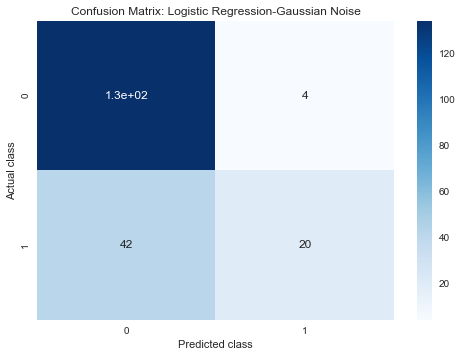

In [261]:
sns.heatmap(cfm_17, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Gaussian Noise')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_n.png')

## LR Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


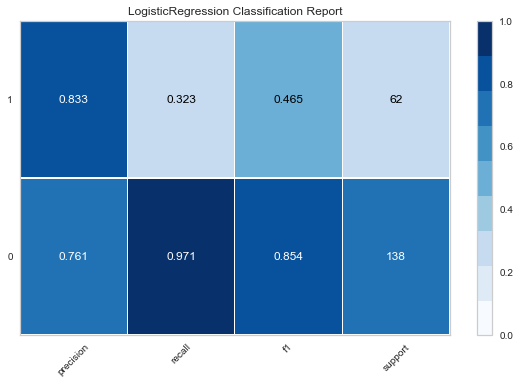

In [262]:
visualizer17 = ClassificationReport(nlr, classes=classes, support=True,cmap='Blues')
visualizer17.fit(X8, y8)
visualizer17.score(X_test, y_test)
visualizer17.show()

## SVM (linear kernel function)

In [263]:
svm_clf_9 = SVC(kernel='linear', probability=True)

In [264]:
svm_clf_9.fit(X8,y8)
n_pred2 = svm_clf_9.predict(X_test)

## SVM prediction probability

In [265]:
accu18 = accuracy_score(y_test, n_pred2)
print("accuracy_score : ",accu18)

accuracy_score :  0.795


## Confusion Matrix

In [266]:
cfm_18 = confusion_matrix(y_test, n_pred2)
print (cfm_18)

[[133   5]
 [ 36  26]]


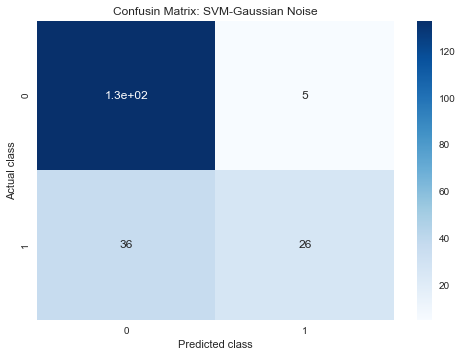

In [267]:
sns.heatmap(cfm_18, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Gaussian Noise')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_n.png')

## SVM Classification Report

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


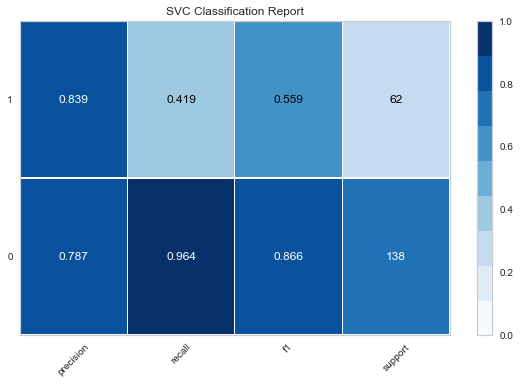

In [268]:
visualizer18 = ClassificationReport(svm_clf_9, classes=classes, support=True,cmap='Blues')
visualizer18.fit(X8, y8)
visualizer18.score(X_test, y_test)
visualizer18.show()